# __Exploratory Data Analysis on the Business Performance of Muesli Distribution Company__

The following KPIs were selected after mapping out the workflow described by the stakeholder, the warehouse manager and browsing through the provided data.

Process KPIs (Cycle Time)
- Order Lead Time   - Average time taken for customers to physically receive their orders from the time they were placed ((Delivery Date – Order Date) / Total Orders Shipped)
- Order Cycle Time  - Average time taken to get orders ready to be shipped ((Ready to Ship Date – Order Date) / Total Orders Shipped)
- Delivery Time     - Average order delivery time ((Delivery Date - On Truck Scan Date)/ Total Orders Shipped)

Process KPIs (Efficiency)
- On-Time Ready to Ship Rate - Number of orders that were dispatched on schedule or ahead of schedule / Total number of orders dispatched
- On-Time Delivery Rate - Number of orders that were delivered on schedule or ahead of schedule / Total number of orders delivered

Further Analysis
- Correlation Matrix and Linear Regression
- Order Lead Time by the Day of the Week
- Number of orders received on each day of the week
- Profitable Channel
- Amount of orders over the years

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Loading and cleaning of the provided data

#### Orders Data

In [2]:
# Order date - full data

orders_data = pd.read_csv('data/Muesli Project raw data - Orders.csv')
orders_data.head(2)

,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,8/11/2019,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420.0,South,Toasted Muesli,With Fruit,FUR-BO-10001798,261.96,2,0.0,41.9136
1,2,CA-2019-152156,8/11/2019,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420.0,South,Toasted Muesli,With Nuts,FUR-CH-10000454,731.94,3,0.0,219.5820


In [3]:
orders_data.shape

(9994, 19)

In [4]:
orders_data.columns

Index(['Index', 'Order ID', 'Order Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
#changing column headers to snake_case
orders_data.columns = orders_data.columns.str.lower()
orders_data.columns = orders_data.columns.str.replace(" ", "_")
orders_data.columns


Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country/region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub-category', 'product_id',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [6]:
#changing 'sub-category' column name to snake_case
orders_data.rename(columns = {'sub-category':'sub_category', 'country/region':'country_region'}, inplace = True)
orders_data.columns

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country_region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub_category', 'product_id',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [7]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9994 non-null   int64  
 1   order_id        9994 non-null   object 
 2   order_date      9994 non-null   object 
 3   ship_mode       9994 non-null   object 
 4   customer_id     9994 non-null   object 
 5   customer_name   9994 non-null   object 
 6   origin_channel  9994 non-null   object 
 7   country_region  9994 non-null   object 
 8   city            9994 non-null   object 
 9   state           9994 non-null   object 
 10  postal_code     9983 non-null   float64
 11  region          9994 non-null   object 
 12  category        9994 non-null   object 
 13  sub_category    9994 non-null   object 
 14  product_id      9994 non-null   object 
 15  sales           9994 non-null   float64
 16  quantity        9994 non-null   int64  
 17  discount        9994 non-null   f

Further data cleaning
- check null values in the postal code column and change data type 
- convert order_date data type to datetime

postal_code - null values and data type

In [8]:
#checking for null values in column 'Postal Code'
orders_data[orders_data.postal_code.isnull()]

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
2234,2235,CA-2020-104066,5/12/2020,Standard Class,QJ-19255,Quincy Jones,Sales,United States,Burlington,Vermont,NaN,East,Special Projects Muesil,Gluten Free,TEC-AC-10001013,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,7/11/2018,Second Class,SV-20785,Stewart Visinsky,Email,United States,Burlington,Vermont,NaN,East,Toasted Muesli,With Nuts,FUR-CH-10000595,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,6/4/2019,Standard Class,VM-21685,Valerie Mitchum,Facebook,United States,Burlington,Vermont,NaN,East,Special Projects Muesil,Only Oats,TEC-PH-10002555,1294.75,5,0.0,336.6350
9146,9147,US-2019-165505,23/1/2019,Standard Class,CB-12535,Claudia Bergmann,Sales,United States,Burlington,Vermont,NaN,East,Special Projects Muesil,Gluten Free,TEC-AC-10002926,99.98,2,0.0,42.9914
9147,9148,US-2019-165505,23/1/2019,Standard Class,CB-12535,Claudia Bergmann,Sales,United States,Burlington,Vermont,NaN,East,Power Muesli,Super Mega Protein,OFF-AR-10003477,8.04,6,0.0,2.7336
9148,9149,US-2019-165505,23/1/2019,Standard Class,CB-12535,Claudia Bergmann,Sales,United States,Burlington,Vermont,NaN,East,Power Muesli,Steel Cut,OFF-ST-10001526,1564.29,13,0.0,406.7154
9386,9387,US-2020-127292,19/1/2020,Standard Class,RM-19375,Raymond Messe,Email,United States,Burlington,Vermont,NaN,East,Power Muesli,Nuts and more,OFF-PA-10000157,79.92,4,0.0,37.5624
9387,9388,US-2020-127292,19/1/2020,Standard Class,RM-19375,Raymond Messe,Email,United States,Burlington,Vermont,NaN,East,Power Muesli,Nuts and more,OFF-PA-10001970,12.28,1,0.0,5.7716
9388,9389,US-2020-127292,19/1/2020,Standard Class,RM-19375,Raymond Messe,Email,United States,Burlington,Vermont,NaN,East,Power Muesli,Mega Protein,OFF-AP-10000828,542.94,3,0.0,152.0232
9389,9390,US-2020-127292,19/1/2020,Standard Class,RM-19375,Raymond Messe,Email,United States,Burlington,Vermont,NaN,East,Power Muesli,Power Clean Fibre Boost,OFF-EN-10001509,2.04,1,0.0,0.9588


In [9]:
# Converting postal code column from float to integer before inserting vermont's postal code
# First, replacing NaN with zero and using astype() to convert

orders_data.postal_code = orders_data.postal_code.fillna(0).astype(int)
orders_data[orders_data.postal_code == 0]

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
2234,2235,CA-2020-104066,5/12/2020,Standard Class,QJ-19255,Quincy Jones,Sales,United States,Burlington,Vermont,0,East,Special Projects Muesil,Gluten Free,TEC-AC-10001013,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,7/11/2018,Second Class,SV-20785,Stewart Visinsky,Email,United States,Burlington,Vermont,0,East,Toasted Muesli,With Nuts,FUR-CH-10000595,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,6/4/2019,Standard Class,VM-21685,Valerie Mitchum,Facebook,United States,Burlington,Vermont,0,East,Special Projects Muesil,Only Oats,TEC-PH-10002555,1294.75,5,0.0,336.6350
9146,9147,US-2019-165505,23/1/2019,Standard Class,CB-12535,Claudia Bergmann,Sales,United States,Burlington,Vermont,0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002926,99.98,2,0.0,42.9914
9147,9148,US-2019-165505,23/1/2019,Standard Class,CB-12535,Claudia Bergmann,Sales,United States,Burlington,Vermont,0,East,Power Muesli,Super Mega Protein,OFF-AR-10003477,8.04,6,0.0,2.7336
9148,9149,US-2019-165505,23/1/2019,Standard Class,CB-12535,Claudia Bergmann,Sales,United States,Burlington,Vermont,0,East,Power Muesli,Steel Cut,OFF-ST-10001526,1564.29,13,0.0,406.7154
9386,9387,US-2020-127292,19/1/2020,Standard Class,RM-19375,Raymond Messe,Email,United States,Burlington,Vermont,0,East,Power Muesli,Nuts and more,OFF-PA-10000157,79.92,4,0.0,37.5624
9387,9388,US-2020-127292,19/1/2020,Standard Class,RM-19375,Raymond Messe,Email,United States,Burlington,Vermont,0,East,Power Muesli,Nuts and more,OFF-PA-10001970,12.28,1,0.0,5.7716
9388,9389,US-2020-127292,19/1/2020,Standard Class,RM-19375,Raymond Messe,Email,United States,Burlington,Vermont,0,East,Power Muesli,Mega Protein,OFF-AP-10000828,542.94,3,0.0,152.0232
9389,9390,US-2020-127292,19/1/2020,Standard Class,RM-19375,Raymond Messe,Email,United States,Burlington,Vermont,0,East,Power Muesli,Power Clean Fibre Boost,OFF-EN-10001509,2.04,1,0.0,0.9588


In [10]:
#orders_data.info()

In [11]:
# Inserting Burlington, vermont's postal code into the dataframe
# Postal code - 05401
orders_data.postal_code.replace(0, 5401, inplace = True)
orders_data[orders_data.state == 'Vermont'].head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
2234,2235,CA-2020-104066,5/12/2020,Standard Class,QJ-19255,Quincy Jones,Sales,United States,Burlington,Vermont,5401,East,Special Projects Muesil,Gluten Free,TEC-AC-10001013,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,7/11/2018,Second Class,SV-20785,Stewart Visinsky,Email,United States,Burlington,Vermont,5401,East,Toasted Muesli,With Nuts,FUR-CH-10000595,715.20,3,0.0,178.8000


In [12]:
# Adding leading zeros to have five integers (05401)
orders_data.postal_code = orders_data.postal_code.apply(lambda x: '{0:0>5}'.format(x))
orders_data[orders_data.state == 'Vermont'].head(2)
#orders_data.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
2234,2235,CA-2020-104066,5/12/2020,Standard Class,QJ-19255,Quincy Jones,Sales,United States,Burlington,Vermont,05401,East,Special Projects Muesil,Gluten Free,TEC-AC-10001013,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,7/11/2018,Second Class,SV-20785,Stewart Visinsky,Email,United States,Burlington,Vermont,05401,East,Toasted Muesli,With Nuts,FUR-CH-10000595,715.20,3,0.0,178.8000


In [13]:
#orders_data.info()

Changing order_date to datetime

In [14]:
orders_data['order_date'] = pd.to_datetime(orders_data['order_date'], format='%d/%m/%Y', utc=False)
orders_data.order_date.head(2)

0   2019-11-08
1   2019-11-08
Name: order_date, dtype: datetime64[ns]

In [15]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9994 non-null   int64         
 1   order_id        9994 non-null   object        
 2   order_date      9994 non-null   datetime64[ns]
 3   ship_mode       9994 non-null   object        
 4   customer_id     9994 non-null   object        
 5   customer_name   9994 non-null   object        
 6   origin_channel  9994 non-null   object        
 7   country_region  9994 non-null   object        
 8   city            9994 non-null   object        
 9   state           9994 non-null   object        
 10  postal_code     9994 non-null   object        
 11  region          9994 non-null   object        
 12  category        9994 non-null   object        
 13  sub_category    9994 non-null   object        
 14  product_id      9994 non-null   object        
 15  sale

Checking for duplicates on order_id and product_id

In [16]:
# Checking for duplicates on order_id - selected kpis are process and output kpis for orders processed

orders_data[orders_data.duplicated(['order_id'])]


,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
1,2,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420,South,Toasted Muesli,With Nuts,FUR-CH-10000454,731.940,3,0.0,219.5820
4,5,US-2018-108966,2018-10-11,Standard Class,SO-20335,Sean O'Donnell,Email,United States,Fort Lauderdale,Florida,33311,South,Power Muesli,Steel Cut,OFF-ST-10000760,22.368,2,0.2,2.5164
6,7,CA-2017-115812,2017-06-09,Standard Class,BH-11710,Brosina Hoffman,Email,United States,Los Angeles,California,90032,West,Power Muesli,Super Mega Protein,OFF-AR-10002833,7.280,4,0.0,1.9656
7,8,CA-2017-115812,2017-06-09,Standard Class,BH-11710,Brosina Hoffman,Email,United States,Los Angeles,California,90032,West,Special Projects Muesil,Only Oats,TEC-PH-10002275,907.152,6,0.2,90.7152
8,9,CA-2017-115812,2017-06-09,Standard Class,BH-11710,Brosina Hoffman,Email,United States,Los Angeles,California,90032,West,Power Muesli,Super Fibre Boost,OFF-BI-10003910,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2019-157728,2019-09-22,Standard Class,RC-19960,Ryan Crowe,Email,United States,Grand Rapids,Michigan,49505,Central,Special Projects Muesil,Only Oats,TEC-PH-10001305,97.980,2,0.0,27.4344
9985,9986,CA-2018-100251,2018-05-17,Standard Class,DV-13465,Dianna Vittorini,Email,United States,Long Beach,New York,11561,East,Power Muesli,Hunger Buster,OFF-SU-10000898,55.600,4,0.0,16.1240
9988,9989,CA-2020-163629,2020-11-17,Standard Class,RA-19885,Ruben Ausman,Sales,United States,Athens,Georgia,30605,South,Special Projects Muesil,Only Oats,TEC-PH-10004006,206.100,5,0.0,55.6470
9991,9992,CA-2020-121258,2020-02-26,Standard Class,DB-13060,Dave Brooks,Email,United States,Costa Mesa,California,92627,West,Special Projects Muesil,Only Oats,TEC-PH-10003645,258.576,2,0.2,19.3932


In [17]:
# Dropping duplicate order_id's

orders_data.drop_duplicates(['order_id'], inplace= True)

In [18]:
# Checking if duplicates were dropped
orders_data[orders_data.duplicated(['order_id'])]

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit


In [19]:
orders_data.shape

(5009, 19)

In [20]:
orders_data.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
0,1,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420,South,Toasted Muesli,With Fruit,FUR-BO-10001798,261.96,2,0.0,41.9136
2,3,CA-2019-138688,2019-06-12,Second Class,DV-13045,Darrin Van Huff,Sales,United States,Los Angeles,California,90036,West,Power Muesli,No Taste All Power,OFF-LA-10000240,14.62,2,0.0,6.8714


In [21]:
orders_data.reset_index()

,level_0,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
0,0,1,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420,South,Toasted Muesli,With Fruit,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,2,3,CA-2019-138688,2019-06-12,Second Class,DV-13045,Darrin Van Huff,Sales,United States,Los Angeles,California,90036,West,Power Muesli,No Taste All Power,OFF-LA-10000240,14.6200,2,0.00,6.8714
2,3,4,US-2018-108966,2018-10-11,Standard Class,SO-20335,Sean O'Donnell,Email,United States,Fort Lauderdale,Florida,33311,South,Toasted Muesli,Sweetened,FUR-TA-10000577,957.5775,5,0.45,-383.0310
3,5,6,CA-2017-115812,2017-06-09,Standard Class,BH-11710,Brosina Hoffman,Email,United States,Los Angeles,California,90032,West,Toasted Muesli,With Fruit and Nuts,FUR-FU-10001487,48.8600,7,0.00,14.1694
4,12,13,CA-2020-114412,2020-04-15,Standard Class,AA-10480,Andrew Allen,Email,United States,Concord,North Carolina,28027,South,Power Muesli,Nuts and more,OFF-PA-10002365,15.5520,3,0.20,5.4432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,9986,9987,CA-2019-125794,2019-09-29,Standard Class,ML-17410,Maris LaWare,Email,United States,Los Angeles,California,90008,West,Special Projects Muesil,Gluten Free,TEC-AC-10003399,36.2400,1,0.00,15.2208
5005,9987,9988,CA-2020-163629,2020-11-17,Standard Class,RA-19885,Ruben Ausman,Sales,United States,Athens,Georgia,30605,South,Special Projects Muesil,Gluten Free,TEC-AC-10001539,79.9900,1,0.00,28.7964
5006,9989,9990,CA-2017-110422,2017-01-21,Second Class,TB-21400,Tom Boeckenhauer,Email,United States,Miami,Florida,33180,South,Toasted Muesli,With Fruit and Nuts,FUR-FU-10001889,25.2480,3,0.20,4.1028
5007,9990,9991,CA-2020-121258,2020-02-26,Standard Class,DB-13060,Dave Brooks,Email,United States,Costa Mesa,California,92627,West,Toasted Muesli,With Fruit and Nuts,FUR-FU-10000747,91.9600,2,0.00,15.6332


In [22]:
orders_data.reset_index(drop = True, inplace = True)

In [23]:
orders_data.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
0,1,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420,South,Toasted Muesli,With Fruit,FUR-BO-10001798,261.9600,2,0.00,41.9136
1,3,CA-2019-138688,2019-06-12,Second Class,DV-13045,Darrin Van Huff,Sales,United States,Los Angeles,California,90036,West,Power Muesli,No Taste All Power,OFF-LA-10000240,14.6200,2,0.00,6.8714
2,4,US-2018-108966,2018-10-11,Standard Class,SO-20335,Sean O'Donnell,Email,United States,Fort Lauderdale,Florida,33311,South,Toasted Muesli,Sweetened,FUR-TA-10000577,957.5775,5,0.45,-383.0310
3,6,CA-2017-115812,2017-06-09,Standard Class,BH-11710,Brosina Hoffman,Email,United States,Los Angeles,California,90032,West,Toasted Muesli,With Fruit and Nuts,FUR-FU-10001487,48.8600,7,0.00,14.1694
4,13,CA-2020-114412,2020-04-15,Standard Class,AA-10480,Andrew Allen,Email,United States,Concord,North Carolina,28027,South,Power Muesli,Nuts and more,OFF-PA-10002365,15.5520,3,0.20,5.4432


In [24]:
orders_data.shape

(5009, 19)

Basic statistics and EDA on cleaned data - orders_data

In [25]:
orders_data.describe()

,index,sales,quantity,discount,profit
count,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000
mean,5044.337792,219.577176,3.801956,0.157007,26.455529
std,2884.456224,553.491752,2.223151,0.207802,207.275518
min,1.000000,0.556000,1.000000,0.000000,-3839.990400
25%,2552.000000,16.270000,2.000000,0.000000,1.799500
50%,5060.000000,51.712000,3.000000,0.200000,8.465600
75%,7577.000000,199.990000,5.000000,0.200000,27.993600
max,9994.000000,11199.968000,14.000000,0.800000,5039.985600


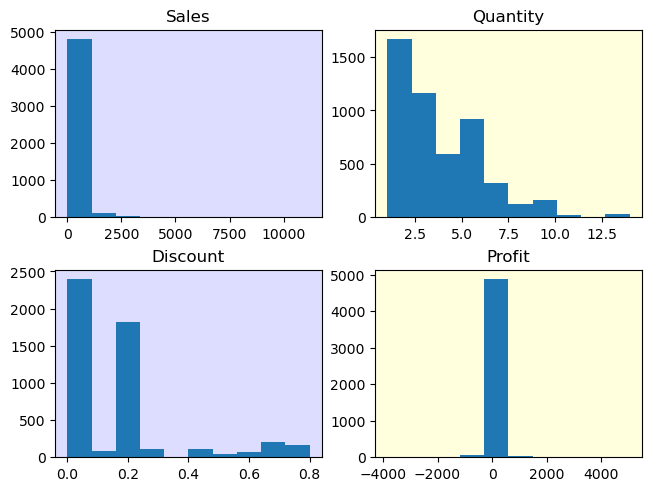

In [26]:
# Distribution plot - histgram to detect skewness and deviation from normal distribution 
fig, axs = plt.subplots(2,2, constrained_layout = True)

axs[0,0].hist(orders_data.sales)
axs[0,1].hist(orders_data.quantity)
axs[1,0].hist(orders_data.discount)
axs[1,1].hist(orders_data.profit)

axs[0,0].set_title("Sales")
axs[0,1].set_title("Quantity")
axs[1,0].set_title("Discount")
axs[1,1].set_title("Profit")

axs[0,0].set_facecolor("#ddddff")
axs[0,1].set_facecolor("#ffffdd")
axs[1,0].set_facecolor("#ddddff")
axs[1,1].set_facecolor("#ffffdd")

#### Ready to Ship Data

In [27]:
# 'Ready to Ship' date - limited data 

ready_to_ship_data = pd.read_csv('data/Muesli Project raw data - InternData Study.csv')
ready_to_ship_data.head(2)

,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,02/09/2019,03/09/2019
1,CA-2019-116540,02/09/2019,03/09/2019


In [28]:
ready_to_ship_data.shape

(290, 3)

In [29]:
ready_to_ship_data.columns

Index(['Order ID', 'Ready to Ship Date', 'Pickup Date'], dtype='object')

In [30]:
#changing column headers to snake_case
ready_to_ship_data.columns = ready_to_ship_data.columns.str.lower()
ready_to_ship_data.columns = ready_to_ship_data.columns.str.replace(" ", "_")
ready_to_ship_data.columns

Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')

In [31]:
ready_to_ship_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            290 non-null    object
 1   ready_to_ship_date  290 non-null    object
 2   pickup_date         290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


Further data cleaning
- No null values
- convert ready_to_ship_date and pickup_date data type to datetime

In [32]:
#converting ready_to_ship_date and pickup_date data type to datetime

ready_to_ship_data['ready_to_ship_date'] = pd.to_datetime(ready_to_ship_data['ready_to_ship_date'], format='%d/%m/%Y', utc=False)
ready_to_ship_data['pickup_date'] = pd.to_datetime(ready_to_ship_data['pickup_date'], format='%d/%m/%Y', utc=False)
ready_to_ship_data.head(2)

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03


In [33]:
ready_to_ship_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            290 non-null    object        
 1   ready_to_ship_date  290 non-null    datetime64[ns]
 2   pickup_date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB


Checking for duplicates on order_id

In [34]:
ready_to_ship_data[ready_to_ship_data.duplicated(['order_id'])]

,order_id,ready_to_ship_date,pickup_date
1,CA-2019-116540,2019-09-02,2019-09-03
6,CA-2019-106278,2019-09-05,2019-09-06
8,CA-2019-158099,2019-09-05,2019-09-06
12,CA-2019-106950,2019-09-06,2019-09-09
13,CA-2019-106950,2019-09-06,2019-09-09
...,...,...,...
278,US-2020-128118,2020-12-01,2020-12-02
279,CA-2020-141439,2020-12-01,2020-12-02
282,CA-2020-107125,2020-12-02,2020-12-04
286,CA-2020-105333,2020-12-04,2020-12-07


In [35]:
# dropping duplicates on order_id - selected kpis are process and output kpis for orders processed

ready_to_ship_data.drop_duplicates(['order_id'], inplace = True)

In [36]:
# Checking if duplicates were dropped

ready_to_ship_data[ready_to_ship_data.duplicated(['order_id'])]

,order_id,ready_to_ship_date,pickup_date


In [37]:
ready_to_ship_data.shape

(204, 3)

In [38]:
ready_to_ship_data.head(2)

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04


In [39]:
ready_to_ship_data.reset_index()

,index,order_id,ready_to_ship_date,pickup_date
0,0,CA-2019-116540,2019-09-02,2019-09-03
1,2,CA-2019-129847,2019-09-04,2019-09-04
2,3,CA-2019-129630,2019-09-04,2019-09-04
3,4,CA-2019-106278,2019-09-05,2019-09-06
4,5,CA-2019-158099,2019-09-05,2019-09-06
...,...,...,...,...
199,283,US-2020-165456,2020-12-03,2020-12-04
200,284,US-2020-110576,2020-12-04,2020-12-07
201,285,CA-2020-105333,2020-12-04,2020-12-07
202,288,CA-2020-119305,2020-12-04,2020-12-07


In [40]:
ready_to_ship_data.reset_index(drop = True, inplace = True)

In [41]:
ready_to_ship_data.head()

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-129847,2019-09-04,2019-09-04
2,CA-2019-129630,2019-09-04,2019-09-04
3,CA-2019-106278,2019-09-05,2019-09-06
4,CA-2019-158099,2019-09-05,2019-09-06


#### On Truck Scan Data

In [42]:
# 'On Truck Scan' Date - full data

on_truck_scan_data = pd.read_csv('data/Muesli Project raw data - Order Process Data.csv')
on_truck_scan_data.head(2)

,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,1,CA-2019-152156,8/11/2019,13/11/2019,Standard Processing
1,2,CA-2019-152156,8/11/2019,13/11/2019,Standard Processing


In [43]:
on_truck_scan_data.shape

(5899, 5)

In [44]:
on_truck_scan_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'On Truck Scan Date', 'Ship Mode'], dtype='object')

In [45]:
#changing column headers to snake_case
on_truck_scan_data.columns = on_truck_scan_data.columns.str.lower()
on_truck_scan_data.columns = on_truck_scan_data.columns.str.replace(" ", "_")
on_truck_scan_data.columns

Index(['row_id', 'order_id', 'order_date', 'on_truck_scan_date', 'ship_mode'], dtype='object')

In [46]:
on_truck_scan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              5899 non-null   int64 
 1   order_id            5899 non-null   object
 2   order_date          5899 non-null   object
 3   on_truck_scan_date  5899 non-null   object
 4   ship_mode           5899 non-null   object
dtypes: int64(1), object(4)
memory usage: 230.6+ KB


Further data cleaning
- No null values
- convert order_date and on_truck_scan_date data type to datetime

In [47]:
#converting order_date and on_truck_scan_date data type to datetime

on_truck_scan_data['order_date'] = pd.to_datetime(on_truck_scan_data['order_date'], format='%d/%m/%Y', utc=False)
on_truck_scan_data['on_truck_scan_date'] = pd.to_datetime(on_truck_scan_data['on_truck_scan_date'], format='%d/%m/%Y', utc=False)
on_truck_scan_data.head(2)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,1,CA-2019-152156,2019-11-08,2019-11-13,Standard Processing
1,2,CA-2019-152156,2019-11-08,2019-11-13,Standard Processing


In [48]:
on_truck_scan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              5899 non-null   int64         
 1   order_id            5899 non-null   object        
 2   order_date          5899 non-null   datetime64[ns]
 3   on_truck_scan_date  5899 non-null   datetime64[ns]
 4   ship_mode           5899 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 230.6+ KB


Checking for duplicates on order_id

In [49]:
# Checking for duplicates on order_id - selected kpis are process and output kpis for orders processed

on_truck_scan_data[on_truck_scan_data.duplicated(['order_id'])]

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
1,2,CA-2019-152156,2019-11-08,2019-11-13,Standard Processing
6,23,CA-2019-137330,2019-12-09,2019-12-16,Standard Processing
9,27,CA-2019-121755,2019-01-16,2019-01-23,Standard Processing
12,37,CA-2019-117590,2019-12-08,2019-12-11,Express
17,46,CA-2019-118255,2019-03-11,2019-03-13,Express
...,...,...,...,...,...
5888,9980,US-2019-103674,2019-12-06,2019-12-11,Standard Processing
5891,9984,US-2019-157728,2019-09-22,2019-10-02,Standard Processing
5894,9989,CA-2020-163629,2020-11-17,2020-11-25,Standard Processing
5896,9992,CA-2020-121258,2020-02-26,2020-03-04,Standard Processing


In [50]:
# Since the order_id were duplicated the duplicates are dropped

on_truck_scan_data.drop_duplicates(['order_id'], inplace = True)

In [51]:
# Checking if duplicates were dropped

on_truck_scan_data[on_truck_scan_data.duplicated(['order_id', 'order_date', 'on_truck_scan_date', 'ship_mode'])]

,row_id,order_id,order_date,on_truck_scan_date,ship_mode


In [52]:
on_truck_scan_data.shape

(3002, 5)

In [53]:
on_truck_scan_data.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,1,CA-2019-152156,2019-11-08,2019-11-13,Standard Processing
2,3,CA-2019-138688,2019-06-12,2019-06-19,Standard Processing
3,13,CA-2020-114412,2020-04-15,2020-04-22,Standard Processing
4,14,CA-2019-161389,2019-12-05,2019-12-11,Standard Processing
5,22,CA-2019-137330,2019-12-09,2019-12-16,Standard Processing


In [54]:
on_truck_scan_data.reset_index(drop = True, inplace = True)

In [55]:
on_truck_scan_data.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,1,CA-2019-152156,2019-11-08,2019-11-13,Standard Processing
1,3,CA-2019-138688,2019-06-12,2019-06-19,Standard Processing
2,13,CA-2020-114412,2020-04-15,2020-04-22,Standard Processing
3,14,CA-2019-161389,2019-12-05,2019-12-11,Standard Processing
4,22,CA-2019-137330,2019-12-09,2019-12-16,Standard Processing


#### Delivery Date Data

In [56]:
# Delivery date - limited data
# Exact delivery dates for shipments that were gathered via marketing promotions where customers scanned a QR code to register for a price
# The assumption here is that customers always scan the code on the day of the order arrival

delivery_date_data = pd.read_csv('data/Muesli Project raw data - Campaign Data.csv')
delivery_date_data.head(2)

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron


In [57]:
delivery_date_data.shape

(333, 3)

In [58]:
delivery_date_data.columns

Index(['Order ID', 'Arrival Scan Date', 'Customer Name'], dtype='object')

In [59]:
#changing column headers to snake_case
delivery_date_data.columns = delivery_date_data.columns.str.lower()
delivery_date_data.columns = delivery_date_data.columns.str.replace(" ", "_")
delivery_date_data.columns

Index(['order_id', 'arrival_scan_date', 'customer_name'], dtype='object')

In [60]:
delivery_date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   order_id           333 non-null    object
 1   arrival_scan_date  333 non-null    object
 2   customer_name      333 non-null    object
dtypes: object(3)
memory usage: 7.9+ KB


Further data cleaning
- No null values
- convert arrival_scan_date data type to datetime

In [61]:
#converting arrival_scan_date data type to datetime

delivery_date_data['arrival_scan_date'] = pd.to_datetime(delivery_date_data['arrival_scan_date'], format='%d/%m/%Y', utc=False)
delivery_date_data.head(2)

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron


In [62]:
delivery_date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   arrival_scan_date  333 non-null    datetime64[ns]
 2   customer_name      333 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.9+ KB


Checking for duplicates on order_id

In [63]:
delivery_date_data[delivery_date_data.duplicated(['order_id'])]

,order_id,arrival_scan_date,customer_name


In [64]:
delivery_date_data.head()

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron
2,CA-2019-130001,2019-05-03,Heather Kirkland
3,CA-2019-113061,2019-05-06,Ed Ludwig
4,CA-2019-162138,2019-05-06,Grace Kelly


## KPI 1 - Order Lead Time

Average time taken for customers to physically receive their orders from the time they were placed

Order Lead Time = ((Delivery Date – Order Date) / Total Orders Shipped)

Note: Delivery Date in the dataFrame is 'arrival_scan_date'

DataFrames required - orders_data and delivery_date_data

In [65]:
# Merging orders_data and delivery_date_data - inner merge on order_id
# inner merge to ensure full data set from both dataFrames are used for the analysis

order_lead_time_data = pd.merge(orders_data, delivery_date_data, on= "order_id", how = 'inner')
order_lead_time_data.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name_x,origin_channel,country_region,city,state,...,region,category,sub_category,product_id,sales,quantity,discount,profit,arrival_scan_date,customer_name_y
0,1,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,...,South,Toasted Muesli,With Fruit,FUR-BO-10001798,261.960,2,0.0,41.9136,2019-11-18,Claire Gute
1,36,CA-2019-117590,2019-12-08,First Class,GH-14485,Gene Hale,Sales,United States,Richardson,Texas,...,Central,Special Projects Muesil,Only Oats,TEC-PH-10004977,1097.544,7,0.2,123.4737,2019-12-16,Gene Hale


In [66]:
order_lead_time_data.shape

(333, 21)

In [67]:
order_lead_time_data.columns

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name_x', 'origin_channel', 'country_region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub_category', 'product_id',
       'sales', 'quantity', 'discount', 'profit', 'arrival_scan_date',
       'customer_name_y'],
      dtype='object')

In [68]:
# Dropping unnecessary columns for the selected KPI

order_lead_time_data = order_lead_time_data.drop([  'index',
                                                    'customer_name_x',
                                                    'origin_channel',
                                                    'category',
                                                    'sub_category', 
                                                    'product_id', 
                                                    'sales',
                                                    'quantity', 
                                                    'discount', 
                                                    'profit',
                                                    'customer_name_y'], 
                                                    axis=1)
order_lead_time_data.head(2)

,order_id,order_date,ship_mode,customer_id,country_region,city,state,postal_code,region,arrival_scan_date
0,CA-2019-152156,2019-11-08,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,2019-11-18
1,CA-2019-117590,2019-12-08,First Class,GH-14485,United States,Richardson,Texas,75080,Central,2019-12-16


In [69]:
order_lead_time_data.shape

(333, 10)

Creating a new column for order lead time (Arrival Scan Date – Order Date)

In [70]:
# np.busday_count to count the business days since orders are not processed or delivered during the weekends

order_lead_time_data['order_lead_time'] = np.busday_count(order_lead_time_data['order_date'].values.astype('datetime64[D]'), 
                                                          order_lead_time_data['arrival_scan_date'].values.astype('datetime64[D]'))
order_lead_time_data.head(2)

,order_id,order_date,ship_mode,customer_id,country_region,city,state,postal_code,region,arrival_scan_date,order_lead_time
0,CA-2019-152156,2019-11-08,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,2019-11-18,6
1,CA-2019-117590,2019-12-08,First Class,GH-14485,United States,Richardson,Texas,75080,Central,2019-12-16,5


In [71]:
# Adding order_year to the dataFrame

order_lead_time_data['order_year'] = pd.to_datetime(order_lead_time_data['order_date']).dt.strftime('%Y')
order_lead_time_data.head(2)

,order_id,order_date,ship_mode,customer_id,country_region,city,state,postal_code,region,arrival_scan_date,order_lead_time,order_year
0,CA-2019-152156,2019-11-08,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,2019-11-18,6,2019
1,CA-2019-117590,2019-12-08,First Class,GH-14485,United States,Richardson,Texas,75080,Central,2019-12-16,5,2019


In [72]:
# Adding order_year to the dataFrame

order_lead_time_data['order_month_year'] = pd.to_datetime(order_lead_time_data['order_date']).dt.strftime('%Y-%m')
order_lead_time_data.head(2)

,order_id,order_date,ship_mode,customer_id,country_region,city,state,postal_code,region,arrival_scan_date,order_lead_time,order_year,order_month_year
0,CA-2019-152156,2019-11-08,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,2019-11-18,6,2019,2019-11
1,CA-2019-117590,2019-12-08,First Class,GH-14485,United States,Richardson,Texas,75080,Central,2019-12-16,5,2019,2019-12


In [73]:
order_lead_time_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   order_date         333 non-null    datetime64[ns]
 2   ship_mode          333 non-null    object        
 3   customer_id        333 non-null    object        
 4   country_region     333 non-null    object        
 5   city               333 non-null    object        
 6   state              333 non-null    object        
 7   postal_code        333 non-null    object        
 8   region             333 non-null    object        
 9   arrival_scan_date  333 non-null    datetime64[ns]
 10  order_lead_time    333 non-null    int64         
 11  order_year         333 non-null    object        
 12  order_month_year   333 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(10)
memory usage: 36.4+ KB

In [74]:
# Reordering columns for easy comparison of the dates

order_lead_time_data = order_lead_time_data[[   "order_id",
                                                "order_year",
                                                "order_month_year",
                                                "order_date",
                                                "arrival_scan_date",
                                                "order_lead_time",                            
                                                "ship_mode",
                                                "customer_id",
                                                "postal_code",
                                                "city",
                                                "state",
                                                "region",
                                                "country_region"]]

order_lead_time_data.head(2)

,order_id,order_year,order_month_year,order_date,arrival_scan_date,order_lead_time,ship_mode,customer_id,postal_code,city,state,region,country_region
0,CA-2019-152156,2019,2019-11,2019-11-08,2019-11-18,6,Second Class,CG-12520,42420,Henderson,Kentucky,South,United States
1,CA-2019-117590,2019,2019-12,2019-12-08,2019-12-16,5,First Class,GH-14485,75080,Richardson,Texas,Central,United States


Separating Express processing from standard processing

In [75]:
# express_order_lead_time becomes a subset of order_lead_time_data containing express/first class shipping data

express_order_lead_time = order_lead_time_data[(order_lead_time_data.ship_mode == 'First Class')]
express_order_lead_time.head(2)

,order_id,order_year,order_month_year,order_date,arrival_scan_date,order_lead_time,ship_mode,customer_id,postal_code,city,state,region,country_region
1,CA-2019-117590,2019,2019-12,2019-12-08,2019-12-16,5,First Class,GH-14485,75080,Richardson,Texas,Central,United States
5,CA-2019-162733,2019,2019-05,2019-05-11,2019-05-20,5,First Class,TT-21070,90045,Los Angeles,California,West,United States


In [76]:
express_order_lead_time.shape

(75, 13)

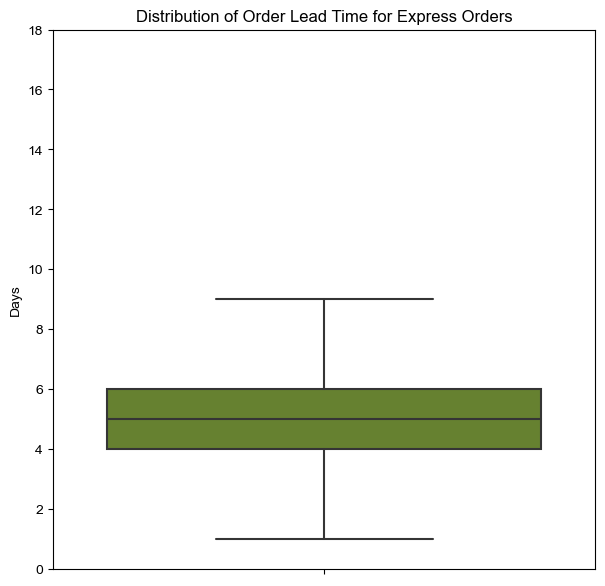

In [77]:
# exploring the distribution of the order_lead_time - express orders

fig, ax = plt.subplots(figsize=(7, 7))

sns.set_theme(style="darkgrid")
chart = sns.boxplot(y = "order_lead_time", data = express_order_lead_time, color = "olivedrab")

chart.set(xlabel = "", ylabel = "Days", title = "Distribution of Order Lead Time for Express Orders")
plt.yticks(range(0, 20, 2), range(0, 20, 2)) 
chart.get_figure();

In [78]:
# standard_order_lead_time becomes a subset of order_lead_time_data containing Second Class and Standard Class/Standard Processing data
# both second class and standard class are referred to as standard processing class in the 'on truck scan data'(logistics data)

standard_order_lead_time = order_lead_time_data[(order_lead_time_data.ship_mode == 'Second Class') |  
                                                (order_lead_time_data.ship_mode == 'Standard Class') ]
standard_order_lead_time.head(2)

,order_id,order_year,order_month_year,order_date,arrival_scan_date,order_lead_time,ship_mode,customer_id,postal_code,city,state,region,country_region
0,CA-2019-152156,2019,2019-11,2019-11-08,2019-11-18,6,Second Class,CG-12520,42420,Henderson,Kentucky,South,United States
2,CA-2019-106075,2019,2019-09,2019-09-18,2019-09-30,8,Standard Class,HM-14980,10009,New York City,New York,East,United States


In [79]:
standard_order_lead_time.shape

(258, 13)

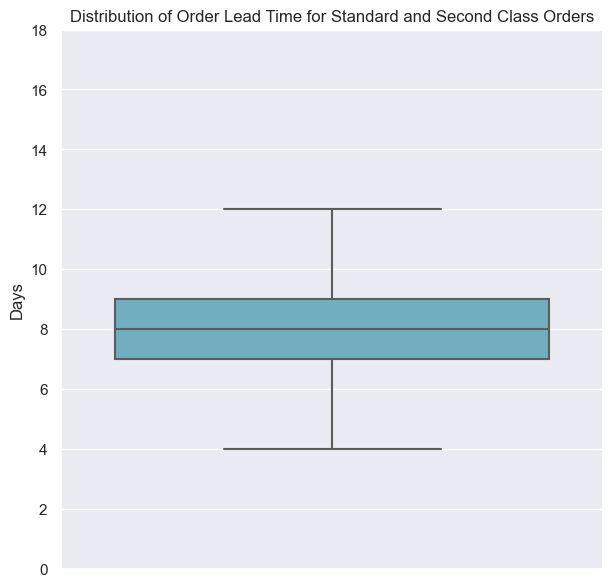

In [80]:
# exploring the distribution of the order_lead_time - standard and second class orders

fig, ax = plt.subplots(figsize=(7, 7))

sns.set_theme(style="darkgrid")
chart = sns.boxplot(y = "order_lead_time", data = standard_order_lead_time, color = "c")

chart.set(xlabel = "", ylabel = "Days", title = "Distribution of Order Lead Time for Standard and Second Class Orders")
plt.yticks(range(0, 20, 2), range(0, 20, 2)) 
chart.get_figure();

Pivot table to calculate the order lead time ((arrival_scan_date – order_date) / Total Orders Shipped) - Express orders

In [81]:
express_lead_time_pivot = pd.pivot_table(express_order_lead_time,
            values= ['order_lead_time', 'order_id'],
            index=('order_year'),
            aggfunc={'order_lead_time':'sum','order_id':'count'},
            margins=False)

express_lead_time_pivot

,order_id,order_lead_time
order_year,,
2019,64,314
2020,11,46


In [82]:
# Calculating avg_delivery_time and adding the column to the pivot table

express_lead_time_pivot['avg_order_lead_time'] = express_lead_time_pivot['order_lead_time'] / express_lead_time_pivot['order_id']
express_lead_time_pivot

,order_id,order_lead_time,avg_order_lead_time
order_year,,,
2019,64,314,4.906250
2020,11,46,4.181818


Express Order Lead Time Viz

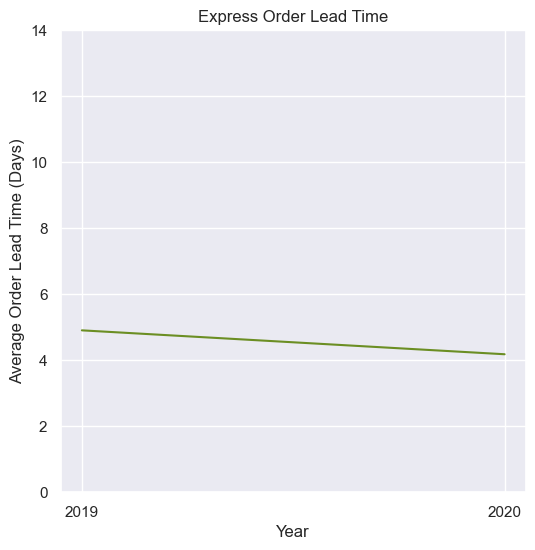

In [83]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="order_year", 
                        y="avg_order_lead_time",
                        data=express_lead_time_pivot,
                        errorbar=None,
                        color = "olivedrab"
                    )


chart.set(xlabel = "Year", ylabel = "Average Order Lead Time (Days)", title = "Express Order Lead Time")
plt.yticks(range(0, 16, 2), range(0, 16, 2)) 
plt.show(chart)

Result: Order lead time in 2020 for express orders was 4 days. Less than the **5 days** promised for express delivery (2 days for processing, order leaves the warehouse once it is ready to ship and 3 days for delivery as promised by the logistics company). 

The lead time in the previous year was 5 days. Hence for express orders, the average order lead time is met the target in 2019 and further improved by a day in 2020.

Pivot table to calculate the order lead time ((arrival_scan_date – order_date) / Total Orders Shipped) - Standard orders

In [84]:
standard_lead_time_pivot = pd.pivot_table(standard_order_lead_time,
            values= ['order_lead_time', 'order_id'],
            index=('order_year'),
            aggfunc={'order_lead_time':'sum','order_id':'count'},
            margins=False)

standard_lead_time_pivot

,order_id,order_lead_time
order_year,,
2019,216,1769
2020,42,335


In [85]:
# Calculating avg_delivery_time and adding the column to the pivot table

standard_lead_time_pivot['avg_order_lead_time'] = standard_lead_time_pivot['order_lead_time'] / standard_lead_time_pivot['order_id']
standard_lead_time_pivot

,order_id,order_lead_time,avg_order_lead_time
order_year,,,
2019,216,1769,8.189815
2020,42,335,7.976190


Standard Order Lead Time Viz

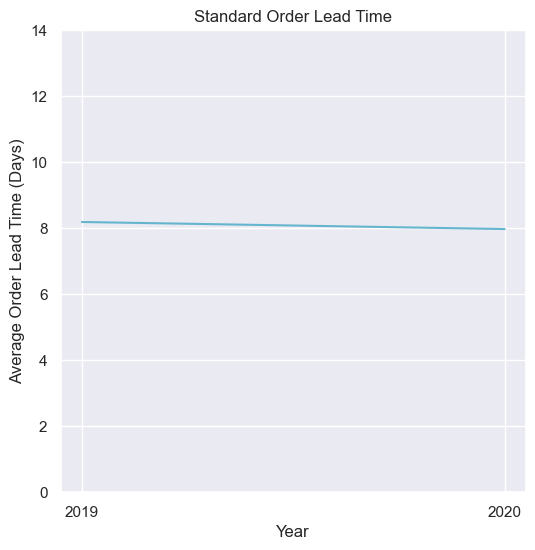

In [86]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="order_year", 
                        y="avg_order_lead_time",
                        data=standard_lead_time_pivot,
                        errorbar=None,
                        color = "c"
                    )


chart.set(xlabel = "Year", ylabel = "Average Order Lead Time (Days)", title = "Standard Order Lead Time")
plt.yticks(range(0, 16, 2), range(0, 16, 2)) 
plt.show(chart)

Result: The average order lead time in both years were 8 days. This is one day above the promised **7 days** maximum (2 days for order fulfilment, 2 days maximum to load on truck and 3 days maximum promised by the logistics company).

#### Monthly Order Lead Time - Expanding on the yearly order lead time calculated above

Pivot table to calculate the order lead time ((arrival_scan_date – order_date) / Total Orders Shipped) - Express orders

In [87]:
express_lead_time_pivot = pd.pivot_table(express_order_lead_time,
            values= ['order_lead_time', 'order_id'],
            index=('order_month_year'),
            aggfunc={'order_lead_time':'sum','order_id':'count'},
            margins=False)

express_lead_time_pivot

,order_id,order_lead_time
order_month_year,,
2019-04,2,13
2019-05,19,83
2019-08,1,9
2019-09,11,55
2019-10,9,44
2019-11,13,65
2019-12,9,45
2020-02,1,5
2020-03,6,25


In [88]:
# Calculating avg_order_lead_time and adding the column to the pivot table

express_lead_time_pivot['avg_order_lead_time'] = express_lead_time_pivot['order_lead_time'] / express_lead_time_pivot['order_id']
express_lead_time_pivot

,order_id,order_lead_time,avg_order_lead_time
order_month_year,,,
2019-04,2,13,6.500000
2019-05,19,83,4.368421
2019-08,1,9,9.000000
2019-09,11,55,5.000000
2019-10,9,44,4.888889
2019-11,13,65,5.000000
2019-12,9,45,5.000000
2020-02,1,5,5.000000
2020-03,6,25,4.166667


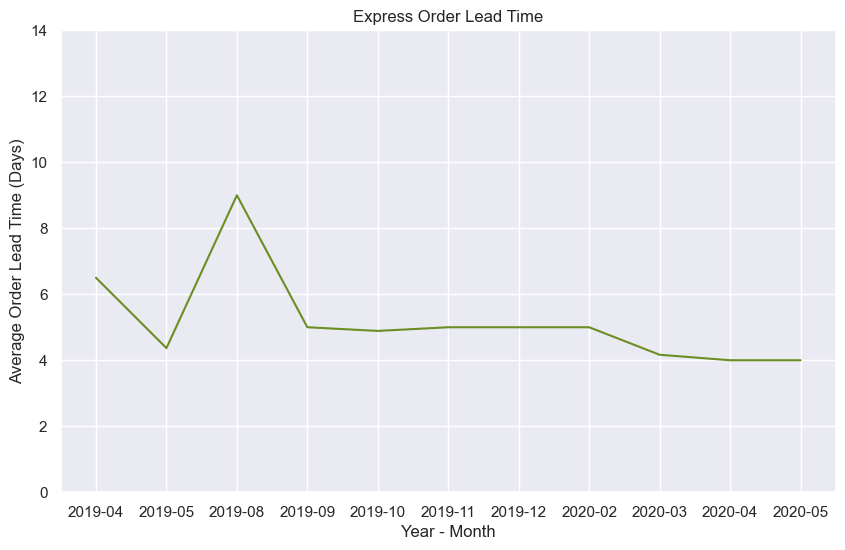

In [89]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="order_month_year", 
                        y="avg_order_lead_time",
                        data=express_lead_time_pivot,
                        errorbar=None,
                        color = "olivedrab"
                    )


chart.set(xlabel = "Year - Month", ylabel = "Average Order Lead Time (Days)", title = "Express Order Lead Time")
plt.yticks(range(0, 16, 2), range(0, 16, 2)) 
plt.show(chart)

Pivot table to calculate the order lead time ((arrival_scan_date – order_date) / Total Orders Shipped) - Standard orders

In [90]:
standard_lead_time_pivot = pd.pivot_table(standard_order_lead_time,
            values= ['order_lead_time', 'order_id'],
            index=('order_month_year'),
            aggfunc={'order_lead_time':'sum','order_id':'count'},
            margins=False)

standard_lead_time_pivot

,order_id,order_lead_time
order_month_year,,
2019-04,15,137
2019-05,46,370
2019-08,5,44
2019-09,54,425
2019-10,29,242
2019-11,38,314
2019-12,29,237
2020-01,14,114
2020-02,7,58


In [91]:
# Calculating avg_delivery_time and adding the column to the pivot table

standard_lead_time_pivot['avg_order_lead_time'] = standard_lead_time_pivot['order_lead_time'] / standard_lead_time_pivot['order_id']
standard_lead_time_pivot

,order_id,order_lead_time,avg_order_lead_time
order_month_year,,,
2019-04,15,137,9.133333
2019-05,46,370,8.043478
2019-08,5,44,8.800000
2019-09,54,425,7.870370
2019-10,29,242,8.344828
2019-11,38,314,8.263158
2019-12,29,237,8.172414
2020-01,14,114,8.142857
2020-02,7,58,8.285714


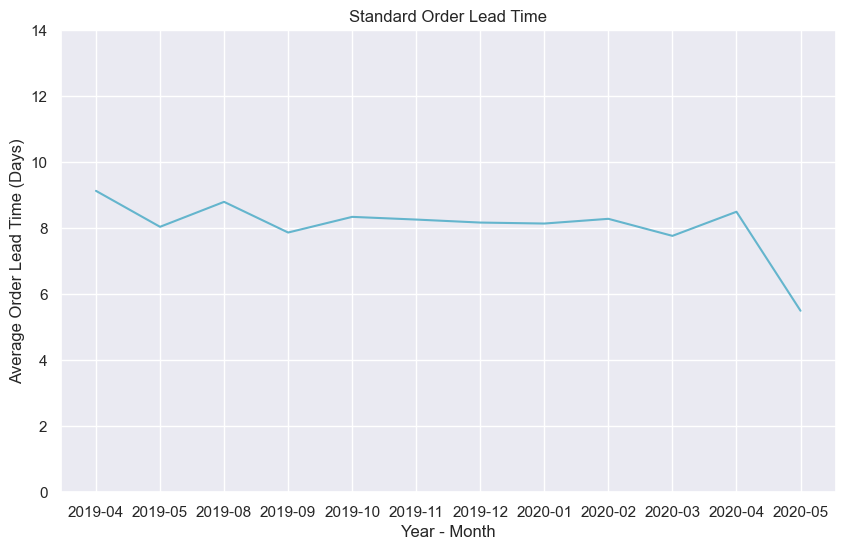

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="order_month_year", 
                        y="avg_order_lead_time",
                        data=standard_lead_time_pivot,
                        errorbar=None,
                        color = "c"
                    )


chart.set(xlabel = "Year - Month", ylabel = "Average Order Lead Time (Days)", title = "Standard Order Lead Time")
plt.yticks(range(0, 16, 2), range(0, 16, 2)) 
plt.show(chart)

## KPI 2 - Order Cycle Time

Average time taken to get orders ready to be shipped

Order Cycle Time = ((Ready to Ship Date – Order Date) / Total Orders Shipped)

DataFrames required - orders_data and ready_to_ship_data

In [93]:
# Merging orders_data and ready_to_ship_data - inner merge on order_id
# inner merge to ensure full data set from both dataFrames are used for the analysis

order_cycle_data = pd.merge(orders_data, ready_to_ship_data, on= "order_id", how = 'inner')
order_cycle_data.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,...,region,category,sub_category,product_id,sales,quantity,discount,profit,ready_to_ship_date,pickup_date
0,97,CA-2020-161018,2020-11-09,Second Class,PN-18775,Parhena Norris,Facebook,United States,New York City,New York,...,East,Toasted Muesli,With Fruit and Nuts,FUR-FU-10000629,96.53,7,0.0,40.5426,2020-11-11,2020-11-13
1,99,CA-2019-149223,2019-09-06,Standard Class,ER-13855,Elpida Rittenbach,Sales,United States,Saint Paul,Minnesota,...,Central,Power Muesli,Mega Protein,OFF-AP-10000358,77.88,6,0.0,22.5852,2019-09-11,2019-09-13


In [94]:
order_cycle_data.shape

(204, 21)

In [95]:
order_cycle_data.columns

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country_region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub_category', 'product_id',
       'sales', 'quantity', 'discount', 'profit', 'ready_to_ship_date',
       'pickup_date'],
      dtype='object')

In [96]:
# Dropping unnecessary columns for the selected KPIs

order_cycle_data = order_cycle_data.drop([  'index',
                                            'origin_channel',
                                            'category',
                                            'sub_category', 
                                            'product_id', 
                                            'sales',
                                            'quantity', 
                                            'discount', 
                                            'profit'], 
                                             axis=1)

In [97]:
order_cycle_data.head(2)

,order_id,order_date,ship_mode,customer_id,customer_name,country_region,city,state,postal_code,region,ready_to_ship_date,pickup_date
0,CA-2020-161018,2020-11-09,Second Class,PN-18775,Parhena Norris,United States,New York City,New York,10009,East,2020-11-11,2020-11-13
1,CA-2019-149223,2019-09-06,Standard Class,ER-13855,Elpida Rittenbach,United States,Saint Paul,Minnesota,55106,Central,2019-09-11,2019-09-13


In [98]:
# Reordering columns for easy comparison of the dates

order_cycle_data = order_cycle_data[[   "order_id",
                                        "order_date",
                                        "ready_to_ship_date",
                                        "pickup_date",                            
                                        "ship_mode",
                                        "customer_id",
                                        "customer_name",
                                        "postal_code",
                                        "city",
                                        "state",
                                        "region",
                                        "country_region"]]

In [99]:
order_cycle_data.tail(3)

,order_id,order_date,ready_to_ship_date,pickup_date,ship_mode,customer_id,customer_name,postal_code,city,state,region,country_region
201,CA-2019-129630,2019-09-04,2019-09-04,2019-09-04,First Class,IM-15055,Ionia McGrath,94122,San Francisco,California,West,United States
202,CA-2020-164028,2020-11-24,2020-11-30,2020-12-02,Standard Class,JL-15835,John Lee,94122,San Francisco,California,West,United States
203,CA-2019-130225,2019-09-11,2019-09-17,2019-09-18,Standard Class,RC-19960,Ryan Crowe,77041,Houston,Texas,Central,United States


In [100]:
order_cycle_data.shape
#order_cycle_data.info()

(204, 12)

Creating a new column for order processing time (Ready to Ship Date – Order Date)

In [101]:
# np.busday_count to count the business days since orders are not processed or delivered during the weekends

order_cycle_data['order_processing_days'] = np.busday_count(order_cycle_data['order_date'].values.astype('datetime64[D]'), 
                                                            order_cycle_data['ready_to_ship_date'].values.astype('datetime64[D]'))
order_cycle_data.tail(3)

,order_id,order_date,ready_to_ship_date,pickup_date,ship_mode,customer_id,customer_name,postal_code,city,state,region,country_region,order_processing_days
201,CA-2019-129630,2019-09-04,2019-09-04,2019-09-04,First Class,IM-15055,Ionia McGrath,94122,San Francisco,California,West,United States,0
202,CA-2020-164028,2020-11-24,2020-11-30,2020-12-02,Standard Class,JL-15835,John Lee,94122,San Francisco,California,West,United States,4
203,CA-2019-130225,2019-09-11,2019-09-17,2019-09-18,Standard Class,RC-19960,Ryan Crowe,77041,Houston,Texas,Central,United States,4


In [102]:
# Adding order_year to the dataFrame

order_cycle_data['order_year'] = pd.to_datetime(order_cycle_data['order_date']).dt.strftime('%Y')
order_cycle_data.tail(3)

,order_id,order_date,ready_to_ship_date,pickup_date,ship_mode,customer_id,customer_name,postal_code,city,state,region,country_region,order_processing_days,order_year
201,CA-2019-129630,2019-09-04,2019-09-04,2019-09-04,First Class,IM-15055,Ionia McGrath,94122,San Francisco,California,West,United States,0,2019
202,CA-2020-164028,2020-11-24,2020-11-30,2020-12-02,Standard Class,JL-15835,John Lee,94122,San Francisco,California,West,United States,4,2020
203,CA-2019-130225,2019-09-11,2019-09-17,2019-09-18,Standard Class,RC-19960,Ryan Crowe,77041,Houston,Texas,Central,United States,4,2019


In [103]:
# Adding order_month_year to the dataFrame

order_cycle_data['order_month_year'] = pd.to_datetime(order_cycle_data['order_date']).dt.strftime('%Y-%m')
order_cycle_data.tail(3)

,order_id,order_date,ready_to_ship_date,pickup_date,ship_mode,customer_id,customer_name,postal_code,city,state,region,country_region,order_processing_days,order_year,order_month_year
201,CA-2019-129630,2019-09-04,2019-09-04,2019-09-04,First Class,IM-15055,Ionia McGrath,94122,San Francisco,California,West,United States,0,2019,2019-09
202,CA-2020-164028,2020-11-24,2020-11-30,2020-12-02,Standard Class,JL-15835,John Lee,94122,San Francisco,California,West,United States,4,2020,2020-11
203,CA-2019-130225,2019-09-11,2019-09-17,2019-09-18,Standard Class,RC-19960,Ryan Crowe,77041,Houston,Texas,Central,United States,4,2019,2019-09


In [104]:
order_cycle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               204 non-null    object        
 1   order_date             204 non-null    datetime64[ns]
 2   ready_to_ship_date     204 non-null    datetime64[ns]
 3   pickup_date            204 non-null    datetime64[ns]
 4   ship_mode              204 non-null    object        
 5   customer_id            204 non-null    object        
 6   customer_name          204 non-null    object        
 7   postal_code            204 non-null    object        
 8   city                   204 non-null    object        
 9   state                  204 non-null    object        
 10  region                 204 non-null    object        
 11  country_region         204 non-null    object        
 12  order_processing_days  204 non-null    int64         
 13  order

In [105]:
# Reordering columns for easy comparison of the dates

order_cycle_data = order_cycle_data[[   "order_id",
                                        "order_year",
                                        "order_month_year",
                                        "order_date",
                                        "ready_to_ship_date",
                                        "order_processing_days",
                                        "pickup_date",                            
                                        "ship_mode",
                                        "customer_id",
                                        "customer_name",
                                        "postal_code",
                                        "city",
                                        "state",
                                        "region",
                                        "country_region"]]

order_cycle_data.tail(3)

,order_id,order_year,order_month_year,order_date,ready_to_ship_date,order_processing_days,pickup_date,ship_mode,customer_id,customer_name,postal_code,city,state,region,country_region
201,CA-2019-129630,2019,2019-09,2019-09-04,2019-09-04,0,2019-09-04,First Class,IM-15055,Ionia McGrath,94122,San Francisco,California,West,United States
202,CA-2020-164028,2020,2020-11,2020-11-24,2020-11-30,4,2020-12-02,Standard Class,JL-15835,John Lee,94122,San Francisco,California,West,United States
203,CA-2019-130225,2019,2019-09,2019-09-11,2019-09-17,4,2019-09-18,Standard Class,RC-19960,Ryan Crowe,77041,Houston,Texas,Central,United States


Separating Express processing from standard processing

In [106]:
order_cycle_data.ship_mode.unique()

array(['Second Class', 'Standard Class', 'First Class'], dtype=object)

In [107]:
on_truck_scan_data.ship_mode.unique()

array(['Standard Processing', 'Express'], dtype=object)

In [108]:
# A example to see if first class ship mode is the same as express ship mode
order_cycle_data[(order_cycle_data.order_id == 'CA-2019-129630')]

,order_id,order_year,order_month_year,order_date,ready_to_ship_date,order_processing_days,pickup_date,ship_mode,customer_id,customer_name,postal_code,city,state,region,country_region
201,CA-2019-129630,2019,2019-09,2019-09-04,2019-09-04,0,2019-09-04,First Class,IM-15055,Ionia McGrath,94122,San Francisco,California,West,United States


In [109]:
on_truck_scan_data[(on_truck_scan_data.order_id == 'CA-2019-129630')]

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
2983,9929,CA-2019-129630,2019-09-04,2019-09-04,Express


**Express ship_mode** in on_truck_scan_data is the same as **First Class ship_mode** in orders_data (which as been merged as order_cycle_data)

In [110]:
# order_cycle_express becomes a subset of order_cycle_data containing express/first class shipping data

order_cycle_express = order_cycle_data[(order_cycle_data.ship_mode == 'First Class')]
order_cycle_express.head(2)

,order_id,order_year,order_month_year,order_date,ready_to_ship_date,order_processing_days,pickup_date,ship_mode,customer_id,customer_name,postal_code,city,state,region,country_region
9,CA-2020-135307,2020,2020-11,2020-11-26,2020-11-27,1,2020-11-27,First Class,LS-17245,Lynn Smith,64118,Gladstone,Missouri,Central,United States
10,CA-2020-162929,2020,2020-11,2020-11-19,2020-11-23,2,2020-11-23,First Class,AS-10135,Adrian Shami,10035,New York City,New York,East,United States


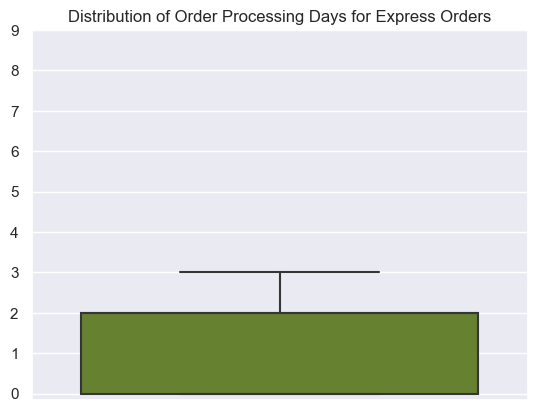

In [111]:
# exploring the distribution of the order_processing_days - express orders

sns.set_theme(style="darkgrid")
chart = sns.boxplot(y = "order_processing_days", data = order_cycle_express, color = "olivedrab")

chart.set(xlabel = "", ylabel = "", title = "Distribution of Order Processing Days for Express Orders")
plt.yticks(np.arange(10), np.arange(10)) 
chart.get_figure();

In [112]:
order_cycle_express.describe()

,order_processing_days
count,53.000000
mean,1.396226
std,1.182234
min,0.000000
25%,0.000000
50%,2.000000
75%,2.000000
max,3.000000


In [113]:
#order_cycle_express.groupby('order_year').nunique()['order_id']
#order_cycle_express.order_id.nunique()
#order_cycle_express.shape

In [114]:
# order_cycle_standard becomes a subset of order_cycle_data containing Second Class and Standard Class/Standard Processing data

order_cycle_standard = order_cycle_data[(order_cycle_data.ship_mode == 'Second Class') |  
                                        (order_cycle_data.ship_mode == 'Standard Class') ]
order_cycle_standard.head(2)

,order_id,order_year,order_month_year,order_date,ready_to_ship_date,order_processing_days,pickup_date,ship_mode,customer_id,customer_name,postal_code,city,state,region,country_region
0,CA-2020-161018,2020,2020-11,2020-11-09,2020-11-11,2,2020-11-13,Second Class,PN-18775,Parhena Norris,10009,New York City,New York,East,United States
1,CA-2019-149223,2019,2019-09,2019-09-06,2019-09-11,3,2019-09-13,Standard Class,ER-13855,Elpida Rittenbach,55106,Saint Paul,Minnesota,Central,United States


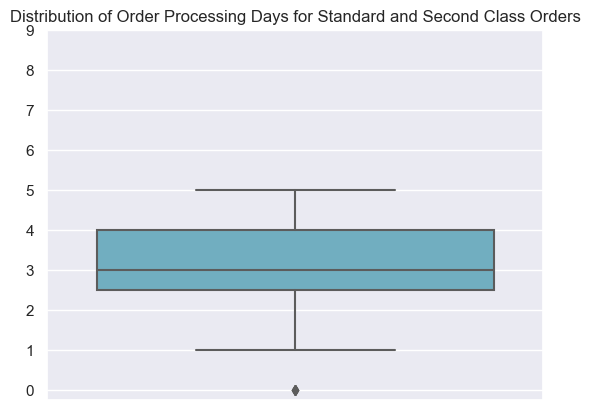

In [115]:
# exploring the distribution of the order_processing_days - standard and second class orders

sns.set_theme(style="darkgrid")
chart = sns.boxplot(y = "order_processing_days", data = order_cycle_standard, color = "c")

chart.set(xlabel = "", ylabel = "", title = "Distribution of Order Processing Days for Standard and Second Class Orders")
plt.yticks(np.arange(10), np.arange(10)) 
chart.get_figure();

Pivot table to calculate the order cycle time - (Ready to Ship Date – Order Date) / Total Orders Shipped) - Express orders

In [116]:
express_order_cycle_pivot = pd.pivot_table(order_cycle_express,
            values= ['order_processing_days', 'order_id'],
            index=('order_year'),
            aggfunc={'order_processing_days':'sum','order_id':'count'},
            margins=False)

express_order_cycle_pivot

,order_id,order_processing_days
order_year,,
2019,13,21
2020,40,53


In [117]:
express_order_cycle_pivot['order_cycle_time'] = express_order_cycle_pivot['order_processing_days'] / express_order_cycle_pivot['order_id']
express_order_cycle_pivot

,order_id,order_processing_days,order_cycle_time
order_year,,,
2019,13,21,1.615385
2020,40,53,1.325000


Express Order Cycle Time Viz

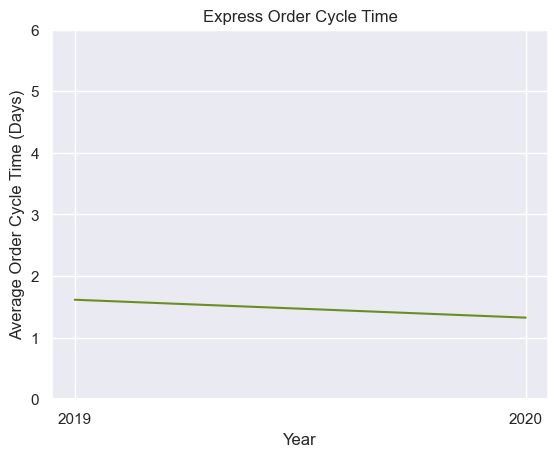

In [118]:
sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="order_year", 
                        y="order_cycle_time",
                        data=express_order_cycle_pivot,
                        errorbar=None,
                        color = "olivedrab"
                    )


chart.set(xlabel = "Year", ylabel = "Average Order Cycle Time (Days)", title = "Express Order Cycle Time")
#plt.yticks([0, 3, 1, 2], [0.0, 3.0, 1.0, 2.0])
plt.yticks(np.arange(7), np.arange(7)) 
plt.show(chart)


Result: The order cycle time for express orders improved between 2019 and 2020 and overall the time is below the two days order processing time highlighted by the stakeholder.

Pivot table to calculate the order cycle time - (Ready to Ship Date – Order Date) / Total Orders Shipped) - Standard orders

In [119]:
standard_order_cycle_pivot = pd.pivot_table(order_cycle_standard,
            values= ['order_processing_days', 'order_id'],
            index=('order_year'),
            aggfunc={'order_processing_days':'sum','order_id':'count'},
            margins=False)

standard_order_cycle_pivot

,order_id,order_processing_days
order_year,,
2019,51,167
2020,100,324


In [120]:
standard_order_cycle_pivot['order_cycle_time'] = standard_order_cycle_pivot['order_processing_days'] / standard_order_cycle_pivot['order_id']
standard_order_cycle_pivot

,order_id,order_processing_days,order_cycle_time
order_year,,,
2019,51,167,3.27451
2020,100,324,3.24000


Standard Order Cycle Time Viz

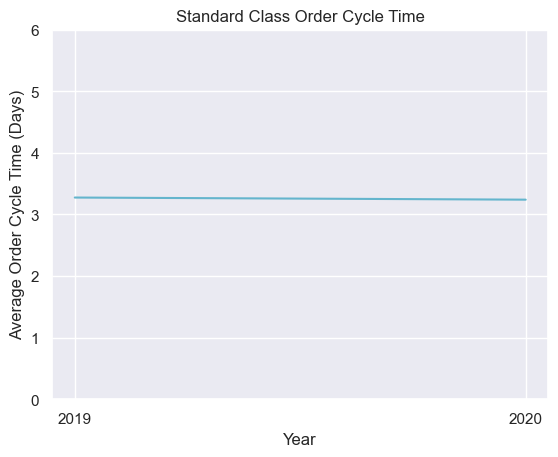

In [121]:
sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="order_year", 
                        y="order_cycle_time",
                        data=standard_order_cycle_pivot,
                        errorbar=None,
                        color = "c"
                    )


chart.set(xlabel = "Year", ylabel = "Average Order Cycle Time (Days)", title = "Standard Class Order Cycle Time")
plt.yticks(np.arange(7), np.arange(7)) 
plt.show(chart)


Result: This should be two days as described by stakeholder. This is considerable above the target of muesli and the warehouse operations in getting the orders ready to ship needs to improve.

## KPI 3 - Delivery Time

Average order delivery time

Average Order Delivery Time = (Delivery Date - On Truck Scan Date)/ Total Orders Shipped

Note: Delivery Date in the dataFrame is 'arrival_scan_date'

DataFrames required - on_truck_scan_data and delivery_date_data

In [122]:
# Merging on_truck_scan_data and delivery_date_data - inner merge on order_id
# inner merge to ensure full data set from both dataFrames are used for the analysis

delivery_time_data = pd.merge(on_truck_scan_data, delivery_date_data, on= "order_id", how = 'inner')
delivery_time_data.head(2)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,customer_name
0,1,CA-2019-152156,2019-11-08,2019-11-13,Standard Processing,2019-11-18,Claire Gute
1,36,CA-2019-117590,2019-12-08,2019-12-11,Express,2019-12-16,Gene Hale


In [123]:
delivery_time_data.shape

(333, 7)

In [124]:
delivery_time_data.columns

Index(['row_id', 'order_id', 'order_date', 'on_truck_scan_date', 'ship_mode',
       'arrival_scan_date', 'customer_name'],
      dtype='object')

In [125]:
# Dropping unnecessary column for the selected KPI

delivery_time_data = delivery_time_data.drop(['row_id'], axis=1)
delivery_time_data.head(2)

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,customer_name
0,CA-2019-152156,2019-11-08,2019-11-13,Standard Processing,2019-11-18,Claire Gute
1,CA-2019-117590,2019-12-08,2019-12-11,Express,2019-12-16,Gene Hale


Creating a new column for delivery time (Delivery Date(also 'arrival_scan_date') - On Truck Scan Date) and delivery year

In [126]:
# Adding delivery time i.e. arrival_scan_date - on_truck_scan_date to the dataFrame
# np.busday_count to count the business days since orders are not processed or delivered during the weekends

delivery_time_data['delivery_days'] = np.busday_count(delivery_time_data['on_truck_scan_date'].values.astype('datetime64[D]'), 
                                                      delivery_time_data['arrival_scan_date'].values.astype('datetime64[D]'))
delivery_time_data.head(3)

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,customer_name,delivery_days
0,CA-2019-152156,2019-11-08,2019-11-13,Standard Processing,2019-11-18,Claire Gute,3
1,CA-2019-117590,2019-12-08,2019-12-11,Express,2019-12-16,Gene Hale,3
2,CA-2019-106075,2019-09-18,2019-09-25,Standard Processing,2019-09-30,Henry MacAllister,3


In [127]:
# Adding delivery_year to the dataFrame

delivery_time_data['delivery_year'] = pd.to_datetime(delivery_time_data['on_truck_scan_date']).dt.strftime('%Y')
delivery_time_data.head(3)

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,customer_name,delivery_days,delivery_year
0,CA-2019-152156,2019-11-08,2019-11-13,Standard Processing,2019-11-18,Claire Gute,3,2019
1,CA-2019-117590,2019-12-08,2019-12-11,Express,2019-12-16,Gene Hale,3,2019
2,CA-2019-106075,2019-09-18,2019-09-25,Standard Processing,2019-09-30,Henry MacAllister,3,2019


In [128]:
# Adding delivery_month_year to the dataFrame

delivery_time_data['delivery_month_year'] = pd.to_datetime(delivery_time_data['on_truck_scan_date']).dt.strftime('%Y-%m')
delivery_time_data.head(3)

,order_id,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,customer_name,delivery_days,delivery_year,delivery_month_year
0,CA-2019-152156,2019-11-08,2019-11-13,Standard Processing,2019-11-18,Claire Gute,3,2019,2019-11
1,CA-2019-117590,2019-12-08,2019-12-11,Express,2019-12-16,Gene Hale,3,2019,2019-12
2,CA-2019-106075,2019-09-18,2019-09-25,Standard Processing,2019-09-30,Henry MacAllister,3,2019,2019-09


In [129]:
delivery_time_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             333 non-null    object        
 1   order_date           333 non-null    datetime64[ns]
 2   on_truck_scan_date   333 non-null    datetime64[ns]
 3   ship_mode            333 non-null    object        
 4   arrival_scan_date    333 non-null    datetime64[ns]
 5   customer_name        333 non-null    object        
 6   delivery_days        333 non-null    int64         
 7   delivery_year        333 non-null    object        
 8   delivery_month_year  333 non-null    object        
dtypes: datetime64[ns](3), int64(1), object(5)
memory usage: 26.0+ KB


In [130]:
# Reordering columns for easy comparison of the dates

delivery_time_data = delivery_time_data[[   "order_id",
                                            "order_date",
                                            "delivery_year",
                                            "delivery_month_year",
                                            "on_truck_scan_date",
                                            "arrival_scan_date",
                                            "delivery_days",
                                            "ship_mode",
                                            "customer_name"]]

delivery_time_data.head(3)

,order_id,order_date,delivery_year,delivery_month_year,on_truck_scan_date,arrival_scan_date,delivery_days,ship_mode,customer_name
0,CA-2019-152156,2019-11-08,2019,2019-11,2019-11-13,2019-11-18,3,Standard Processing,Claire Gute
1,CA-2019-117590,2019-12-08,2019,2019-12,2019-12-11,2019-12-16,3,Express,Gene Hale
2,CA-2019-106075,2019-09-18,2019,2019-09,2019-09-25,2019-09-30,3,Standard Processing,Henry MacAllister


In [131]:
delivery_time_data.shape

(333, 9)

Separating Express processing from standard processing

In [132]:
on_truck_scan_data.ship_mode.unique()

array(['Standard Processing', 'Express'], dtype=object)

In [133]:
# Express processing
# express_delivery_time becomes a subset of delivery_time_data containing express delivery data

express_delivery_time = delivery_time_data[(delivery_time_data.ship_mode == 'Express')]
express_delivery_time.head(2)

,order_id,order_date,delivery_year,delivery_month_year,on_truck_scan_date,arrival_scan_date,delivery_days,ship_mode,customer_name
1,CA-2019-117590,2019-12-08,2019,2019-12,2019-12-11,2019-12-16,3,Express,Gene Hale
5,CA-2019-162733,2019-05-11,2019,2019-05,2019-05-15,2019-05-20,3,Express,Ted Trevino


In [134]:
express_delivery_time.shape

(75, 9)

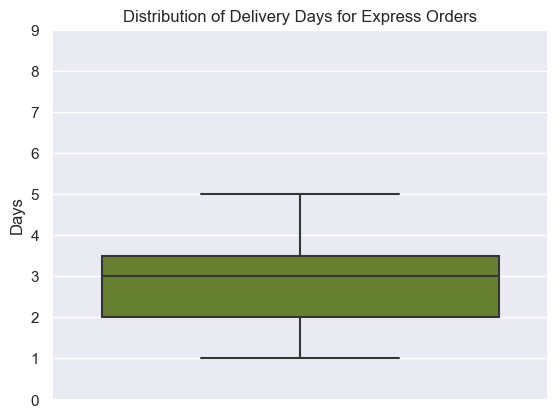

In [135]:
# exploring the distribution of the delivery_days - express orders

sns.set_theme(style="darkgrid")
chart = sns.boxplot(y = "delivery_days", data = express_delivery_time, color = "olivedrab")

chart.set(xlabel = "", ylabel = "Days", title = "Distribution of Delivery Days for Express Orders")
plt.yticks(np.arange(10), np.arange(10)) 
chart.get_figure();

In [136]:
# Checking for the 50% of the data distribution

express_delivery_time.describe()

,delivery_days
count,75.000000
mean,2.853333
std,1.204646
min,1.000000
25%,2.000000
50%,3.000000
75%,3.500000
max,5.000000


In [137]:
# Standard processing
# standard_delivery_time becomes a subset of delivery_time_data containing standard delivery data

standard_delivery_time = delivery_time_data[(delivery_time_data.ship_mode == 'Standard Processing')]
standard_delivery_time.head(2)

,order_id,order_date,delivery_year,delivery_month_year,on_truck_scan_date,arrival_scan_date,delivery_days,ship_mode,customer_name
0,CA-2019-152156,2019-11-08,2019,2019-11,2019-11-13,2019-11-18,3,Standard Processing,Claire Gute
2,CA-2019-106075,2019-09-18,2019,2019-09,2019-09-25,2019-09-30,3,Standard Processing,Henry MacAllister


In [138]:
standard_delivery_time.shape

(258, 9)

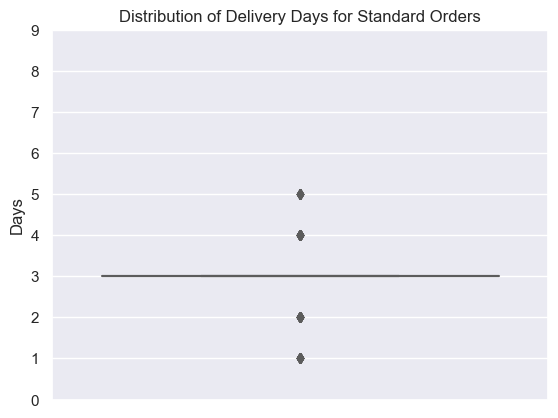

In [139]:
# exploring the distribution of the delivery_days - standard orders

sns.set_theme(style="darkgrid")
chart = sns.boxplot(y = "delivery_days", data = standard_delivery_time, color = "c")

chart.set(xlabel = "", ylabel = "Days", title = "Distribution of Delivery Days for Standard Orders")
plt.yticks(np.arange(10), np.arange(10)) 
chart.get_figure();

In [140]:
# Checking for the 50% of the data distribution

standard_delivery_time.describe()

,delivery_days
count,258.000000
mean,2.941860
std,0.873581
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,5.000000


Pivot table to calculate the delivery time - ((arrival_scan_date - on_truck_scan_date)/ Total Orders Shipped) - Express orders

In [141]:
express_delivery_time_pivot = pd.pivot_table(express_delivery_time,
            values= ['delivery_days', 'order_id'],
            index=('delivery_year'),
            aggfunc={'delivery_days':'sum','order_id':'count'},
            margins=False)

express_delivery_time_pivot

,delivery_days,order_id
delivery_year,,
2019,180,61
2020,34,14


In [142]:
# Calculating avg_delivery_time and adding the column to the pivot table

express_delivery_time_pivot['avg_delivery_time'] = express_delivery_time_pivot['delivery_days'] / express_delivery_time_pivot['order_id']
express_delivery_time_pivot

,delivery_days,order_id,avg_delivery_time
delivery_year,,,
2019,180,61,2.950820
2020,34,14,2.428571


Express Average Delivery Time Viz

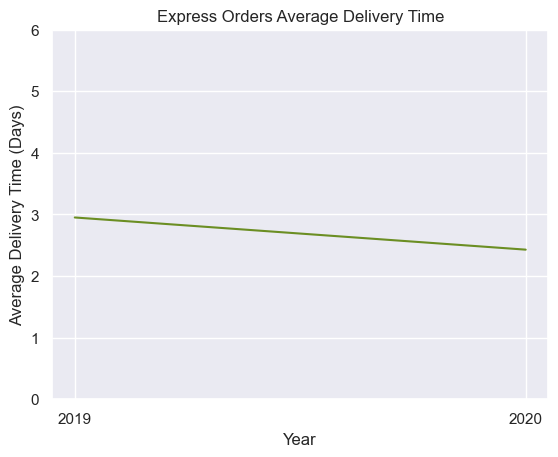

In [143]:
sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="delivery_year", 
                        y="avg_delivery_time",
                        data=express_delivery_time_pivot,
                        errorbar=None,
                        color = "olivedrab"
                    )


chart.set(xlabel = "Year", ylabel = "Average Delivery Time (Days)", title = "Express Orders Average Delivery Time")
plt.yticks(np.arange(7), np.arange(7)) 
plt.show(chart)


Result: According to the stakeholder, three days was promised by the delivery company between the time order leaves the warehouse on truck and when order is delivered  to the customer. 

Express delivery takes 3 days as promised.

Pivot table to calculate the delivery time - ((arrival_scan_date - on_truck_scan_date)/ Total Orders Shipped) - Standard orders

In [144]:
standard_delivery_time_pivot = pd.pivot_table(standard_delivery_time,
            values= ['delivery_days', 'order_id'],
            index=('delivery_year'),
            aggfunc={'delivery_days':'sum','order_id':'count'},
            margins=False)

standard_delivery_time_pivot

,delivery_days,order_id
delivery_year,,
2019,615,206
2020,144,52


In [145]:
# Calculating avg_delivery_time and adding the column to the pivot table

standard_delivery_time_pivot['avg_delivery_time'] = standard_delivery_time_pivot['delivery_days'] / standard_delivery_time_pivot['order_id']
standard_delivery_time_pivot

,delivery_days,order_id,avg_delivery_time
delivery_year,,,
2019,615,206,2.985437
2020,144,52,2.769231


Standard Average Delivery Time Viz

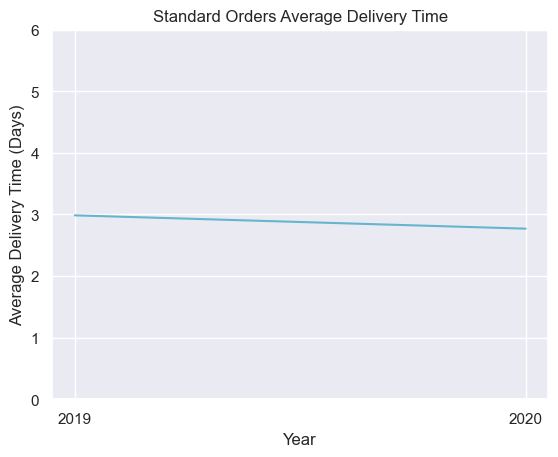

In [146]:
sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="delivery_year", 
                        y="avg_delivery_time",
                        data=standard_delivery_time_pivot,
                        errorbar=None,
                        color = "c"
                    )


chart.set(xlabel = "Year", ylabel = "Average Delivery Time (Days)", title = "Standard Orders Average Delivery Time")
plt.yticks(np.arange(7), np.arange(7)) 
plt.show(chart)

Result: Just like the average delivery time for express orders, on the average, standard orders are delivered within the promised three days by the logistics company.

Monthly delivery time data

Pivot table to calculate the delivery time - ((arrival_scan_date - on_truck_scan_date)/ Total Orders Shipped) - Express orders

In [147]:
express_delivery_time_pivot = pd.pivot_table(express_delivery_time,
            values= ['delivery_days', 'order_id'],
            index=('delivery_month_year'),
            aggfunc={'delivery_days':'sum','order_id':'count'},
            margins=False)

express_delivery_time_pivot

,delivery_days,order_id
delivery_month_year,,
2019-04,4,1
2019-05,52,19
2019-06,3,1
2019-09,38,11
2019-10,27,9
2019-11,38,13
2019-12,18,7
2020-01,6,3
2020-02,3,1


In [148]:
# Calculating avg_delivery_time and adding the column to the pivot table

express_delivery_time_pivot['avg_delivery_time'] = express_delivery_time_pivot['delivery_days'] / express_delivery_time_pivot['order_id']
express_delivery_time_pivot

,delivery_days,order_id,avg_delivery_time
delivery_month_year,,,
2019-04,4,1,4.000000
2019-05,52,19,2.736842
2019-06,3,1,3.000000
2019-09,38,11,3.454545
2019-10,27,9,3.000000
2019-11,38,13,2.923077
2019-12,18,7,2.571429
2020-01,6,3,2.000000
2020-02,3,1,3.000000


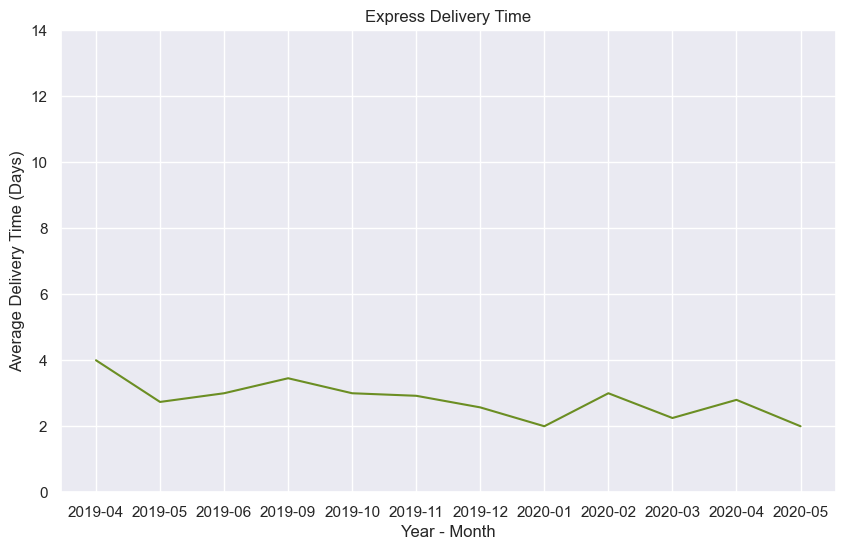

In [149]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="delivery_month_year", 
                        y="avg_delivery_time",
                        data=express_delivery_time_pivot,
                        errorbar=None,
                        color = "olivedrab"
                    )


chart.set(xlabel = "Year - Month", ylabel = "Average Delivery Time (Days)", title = "Express Delivery Time")
plt.yticks(range(0, 16, 2), range(0, 16, 2)) 
plt.show(chart)

Pivot table to calculate the delivery time - ((arrival_scan_date - on_truck_scan_date)/ Total Orders Shipped) - Standard orders

In [150]:
standard_delivery_time_pivot = pd.pivot_table(standard_delivery_time,
            values= ['delivery_days', 'order_id'],
            index=('delivery_month_year'),
            aggfunc={'delivery_days':'sum','order_id':'count'},
            margins=False)

standard_delivery_time_pivot

,delivery_days,order_id
delivery_month_year,,
2019-04,9,2
2019-05,162,52
2019-06,20,7
2019-09,134,47
2019-10,97,33
2019-11,102,35
2019-12,91,30
2020-01,51,22
2020-02,24,8


In [151]:
# Calculating avg_delivery_time and adding the column to the pivot table

standard_delivery_time_pivot['avg_delivery_time'] = standard_delivery_time_pivot['delivery_days'] / standard_delivery_time_pivot['order_id']
standard_delivery_time_pivot

,delivery_days,order_id,avg_delivery_time
delivery_month_year,,,
2019-04,9,2,4.500000
2019-05,162,52,3.115385
2019-06,20,7,2.857143
2019-09,134,47,2.851064
2019-10,97,33,2.939394
2019-11,102,35,2.914286
2019-12,91,30,3.033333
2020-01,51,22,2.318182
2020-02,24,8,3.000000


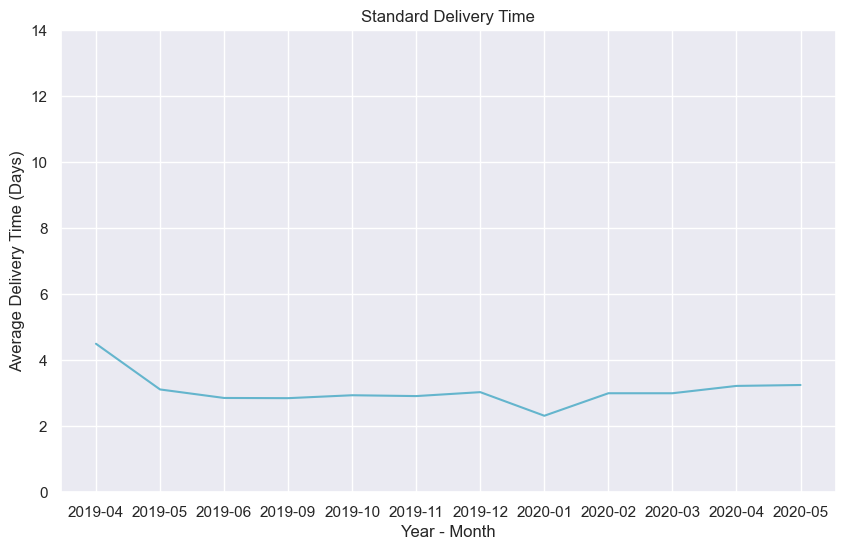

In [152]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="delivery_month_year", 
                        y="avg_delivery_time",
                        data=standard_delivery_time_pivot,
                        errorbar=None,
                        color = "c"
                    )


chart.set(xlabel = "Year - Month", ylabel = "Average Delivery Time (Days)", title = "Standard Delivery Time")
plt.yticks(range(0, 16, 2), range(0, 16, 2)) 
plt.show(chart)

## KPI 4 - On-Time Ready to Ship Rate

On-Time Ready to Ship Rate = Number of orders that were dispatched on schedule or ahead of schedule / Total number of orders dispatched

Defining "dispatched on schedule" - Scheduled number of days between **order date** and **dispatch date (on truck scan date)** for Express and Standard Orders

For express orders: 2 days ("Customers can pay for Express Processing. That is, orders leave on the truck the day the order is ready for shipping" - Warehouse Manager)

For standard and second class orders: 3 days (orders leave the next day after its ready) or 4 days maximum (if truck is not available the next day). Hence, orders dispatched 4 days or earlier are considered as orders dispatched on schedule (2 days - order processing and 2 - days max for orders to leave warehouse on truck)


DataFrames required - orders_data and on_truck_scan_data

In [153]:
# Merging orders_data and on_truck_scan_data - inner merge on order_id
# inner merge to ensure full data set from both dataFrames are used for the analysis

dispatched_data = pd.merge(orders_data, on_truck_scan_data, on= "order_id", how = 'inner')
dispatched_data.head(2)

,index,order_id,order_date_x,ship_mode_x,customer_id,customer_name,origin_channel,country_region,city,state,...,sub_category,product_id,sales,quantity,discount,profit,row_id,order_date_y,on_truck_scan_date,ship_mode_y
0,1,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,...,With Fruit,FUR-BO-10001798,261.96,2,0.0,41.9136,1,2019-11-08,2019-11-13,Standard Processing
1,3,CA-2019-138688,2019-06-12,Second Class,DV-13045,Darrin Van Huff,Sales,United States,Los Angeles,California,...,No Taste All Power,OFF-LA-10000240,14.62,2,0.0,6.8714,3,2019-06-12,2019-06-19,Standard Processing


In [154]:
dispatched_data.shape

(3002, 23)

In [155]:
dispatched_data.columns

Index(['index', 'order_id', 'order_date_x', 'ship_mode_x', 'customer_id',
       'customer_name', 'origin_channel', 'country_region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub_category', 'product_id',
       'sales', 'quantity', 'discount', 'profit', 'row_id', 'order_date_y',
       'on_truck_scan_date', 'ship_mode_y'],
      dtype='object')

In [156]:
# Dropping unnecessary columns for the selected KPI

dispatched_data = dispatched_data.drop([    'index',
                                            'customer_name',
                                            'origin_channel',
                                            'category',
                                            'sub_category', 
                                            'product_id', 
                                            'sales',
                                            'quantity', 
                                            'discount', 
                                            'profit',
                                            'row_id',
                                            'order_date_y',
                                            'ship_mode_y'], 
                                             axis=1)
dispatched_data.head(2)

,order_id,order_date_x,ship_mode_x,customer_id,country_region,city,state,postal_code,region,on_truck_scan_date
0,CA-2019-152156,2019-11-08,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,2019-11-13
1,CA-2019-138688,2019-06-12,Second Class,DV-13045,United States,Los Angeles,California,90036,West,2019-06-19


In [157]:
dispatched_data.shape

(3002, 10)

In [158]:
#changing 'order_date_x' and 'ship_mode_x' column name to column names without '_x'
dispatched_data.rename(columns = {'order_date_x':'order_date', 'ship_mode_x':'ship_mode'}, inplace = True)
dispatched_data.columns

Index(['order_id', 'order_date', 'ship_mode', 'customer_id', 'country_region',
       'city', 'state', 'postal_code', 'region', 'on_truck_scan_date'],
      dtype='object')

Creating a new column for order processing time (On Truck Scan Date – Order Date)

In [159]:
#np.busday_count to count the business days since orders are not processed or delivered during the weekends

dispatched_data['order_to_dispatch_days'] = np.busday_count(dispatched_data['order_date'].values.astype('datetime64[D]'), 
                                                            dispatched_data['on_truck_scan_date'].values.astype('datetime64[D]'))
dispatched_data.head(2)

,order_id,order_date,ship_mode,customer_id,country_region,city,state,postal_code,region,on_truck_scan_date,order_to_dispatch_days
0,CA-2019-152156,2019-11-08,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,2019-11-13,3
1,CA-2019-138688,2019-06-12,Second Class,DV-13045,United States,Los Angeles,California,90036,West,2019-06-19,5


In [160]:
# Adding order_year to the dataFrame

dispatched_data['order_year'] = pd.to_datetime(dispatched_data['order_date']).dt.strftime('%Y')
dispatched_data.head(2)

,order_id,order_date,ship_mode,customer_id,country_region,city,state,postal_code,region,on_truck_scan_date,order_to_dispatch_days,order_year
0,CA-2019-152156,2019-11-08,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,2019-11-13,3,2019
1,CA-2019-138688,2019-06-12,Second Class,DV-13045,United States,Los Angeles,California,90036,West,2019-06-19,5,2019


In [161]:
# Adding order_year to the dataFrame

dispatched_data['order_month_year'] = pd.to_datetime(dispatched_data['order_date']).dt.strftime('%Y-%m')
dispatched_data.head(2)

,order_id,order_date,ship_mode,customer_id,country_region,city,state,postal_code,region,on_truck_scan_date,order_to_dispatch_days,order_year,order_month_year
0,CA-2019-152156,2019-11-08,Second Class,CG-12520,United States,Henderson,Kentucky,42420,South,2019-11-13,3,2019,2019-11
1,CA-2019-138688,2019-06-12,Second Class,DV-13045,United States,Los Angeles,California,90036,West,2019-06-19,5,2019,2019-06


In [162]:
# Reordering columns for easy comparison of the dates

dispatched_data = dispatched_data[[     "order_id",
                                        "order_year",
                                        "order_month_year",
                                        "order_date",
                                        "on_truck_scan_date",
                                        "order_to_dispatch_days",                            
                                        "ship_mode",
                                        "customer_id",
                                        "postal_code",
                                        "city",
                                        "state",
                                        "region",
                                        "country_region"]]

dispatched_data.head(2)

,order_id,order_year,order_month_year,order_date,on_truck_scan_date,order_to_dispatch_days,ship_mode,customer_id,postal_code,city,state,region,country_region
0,CA-2019-152156,2019,2019-11,2019-11-08,2019-11-13,3,Second Class,CG-12520,42420,Henderson,Kentucky,South,United States
1,CA-2019-138688,2019,2019-06,2019-06-12,2019-06-19,5,Second Class,DV-13045,90036,Los Angeles,California,West,United States


In [163]:
dispatched_data.shape

(3002, 13)

Separating Express processing from standard processing

In [164]:
# dispatched_data_express becomes a subset of dispatched_data containing express/first class shipping data

dispatched_data_express = dispatched_data[(dispatched_data.ship_mode == 'First Class')]
dispatched_data_express.head(2)

,order_id,order_year,order_month_year,order_date,on_truck_scan_date,order_to_dispatch_days,ship_mode,customer_id,postal_code,city,state,region,country_region
8,CA-2019-117590,2019,2019-12,2019-12-08,2019-12-11,2,First Class,GH-14485,75080,Richardson,Texas,Central,United States
12,CA-2019-118255,2019,2019-03,2019-03-11,2019-03-13,2,First Class,ON-18715,55122,Eagan,Minnesota,Central,United States


In [165]:
# dispatched_data_express.ont_schedule = dispatched_data_express.loc[dispatched_data_express.order_to_dispatch_days <= 2, 'ont_schedule'] = 1
# dispatched_data_express
# dispatched_data_express.ont_schedule = dispatched_data_express.ont_schedule.fillna(0).astype(int)
# dispatched_data_express.ont_schedule = dispatched_data_express.ont_schedule.astype(float)
# dispatched_data_express.ont_schedule = pd.to_numeric(dispatched_data_express.ont_schedule, downcast = 'float')

In [166]:
# Identifying orders that were dispatched on schedule and assigning 1 in a new column 'dispatch_on_schedule' (for express orders <= 2days)
dispatched_data_express['dispatched_on_schedule'] = np.where(dispatched_data_express['order_to_dispatch_days'] <= 2, 1, 0)
dispatched_data_express.head(3)

/var/folders/vy/1x45wzvd3bqdpxbbvpbxrf280000gn/T/ipykernel_6818/312657097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispatched_data_express['dispatched_on_schedule'] = np.where(dispatched_data_express['order_to_dispatch_days'] <= 2, 1, 0)


,order_id,order_year,order_month_year,order_date,on_truck_scan_date,order_to_dispatch_days,ship_mode,customer_id,postal_code,city,state,region,country_region,dispatched_on_schedule
8,CA-2019-117590,2019,2019-12,2019-12-08,2019-12-11,2,First Class,GH-14485,75080,Richardson,Texas,Central,United States,1
12,CA-2019-118255,2019,2019-03,2019-03-11,2019-03-13,2,First Class,ON-18715,55122,Eagan,Minnesota,Central,United States,1
15,CA-2019-111682,2019,2019-06,2019-06-17,2019-06-19,2,First Class,TB-21055,12180,Troy,New York,East,United States,1


In [167]:
# Reordering columns for easy comparison

dispatched_data_express = dispatched_data_express[[     "order_id",
                                                        "order_year",
                                                        "order_month_year",
                                                        "order_date",
                                                        "on_truck_scan_date",
                                                        "order_to_dispatch_days",
                                                        "dispatched_on_schedule",                            
                                                        "ship_mode",
                                                        "customer_id",
                                                        "postal_code",
                                                        "city",
                                                        "state",
                                                        "region",
                                                        "country_region"]]

dispatched_data_express.head(2)

,order_id,order_year,order_month_year,order_date,on_truck_scan_date,order_to_dispatch_days,dispatched_on_schedule,ship_mode,customer_id,postal_code,city,state,region,country_region
8,CA-2019-117590,2019,2019-12,2019-12-08,2019-12-11,2,1,First Class,GH-14485,75080,Richardson,Texas,Central,United States
12,CA-2019-118255,2019,2019-03,2019-03-11,2019-03-13,2,1,First Class,ON-18715,55122,Eagan,Minnesota,Central,United States


In [168]:
dispatched_data_express.shape

(662, 14)

In [169]:
dispatched_data_express.groupby([dispatched_data_express.order_to_dispatch_days <= 2]).count()['order_id']

order_to_dispatch_days
False    181
True     481
Name: order_id, dtype: int64

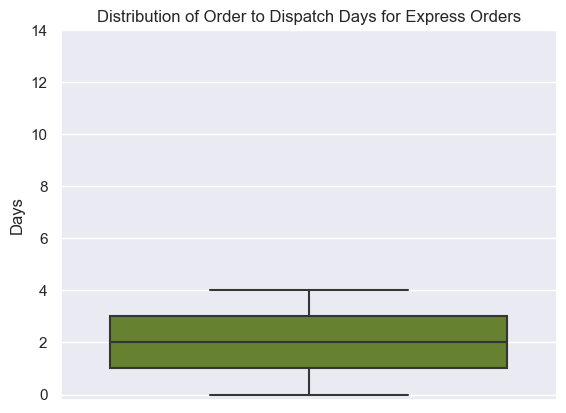

In [170]:
# exploring the distribution of the order_to_dispatch_days - express orders

sns.set_theme(style="darkgrid")
chart = sns.boxplot(y = "order_to_dispatch_days", data = dispatched_data_express, color = "olivedrab")

chart.set(xlabel = "", ylabel = "Days", title = "Distribution of Order to Dispatch Days for Express Orders")
plt.yticks(range(0, 16, 2), range(0, 16, 2)) 
chart.get_figure();

In [171]:
# dispatched_data_standard becomes a subset of dispatched_data containing Second Class and Standard Class/Standard Processing data

dispatched_data_standard = dispatched_data[(dispatched_data.ship_mode == 'Second Class') |  
                                        (dispatched_data.ship_mode == 'Standard Class') ]
dispatched_data_standard.head(2)

,order_id,order_year,order_month_year,order_date,on_truck_scan_date,order_to_dispatch_days,ship_mode,customer_id,postal_code,city,state,region,country_region
0,CA-2019-152156,2019,2019-11,2019-11-08,2019-11-13,3,Second Class,CG-12520,42420,Henderson,Kentucky,South,United States
1,CA-2019-138688,2019,2019-06,2019-06-12,2019-06-19,5,Second Class,DV-13045,90036,Los Angeles,California,West,United States


In [172]:
# Identifying orders that were dispatched on schedule and assigning 1 in a new column 'dispatch_on_schedule' (for standard orders <= 4 days)
dispatched_data_standard['dispatched_on_schedule'] = np.where(dispatched_data_standard['order_to_dispatch_days'] <= 4, 1, 0)
dispatched_data_standard.head(3)

/var/folders/vy/1x45wzvd3bqdpxbbvpbxrf280000gn/T/ipykernel_6818/3017208029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispatched_data_standard['dispatched_on_schedule'] = np.where(dispatched_data_standard['order_to_dispatch_days'] <= 4, 1, 0)


,order_id,order_year,order_month_year,order_date,on_truck_scan_date,order_to_dispatch_days,ship_mode,customer_id,postal_code,city,state,region,country_region,dispatched_on_schedule
0,CA-2019-152156,2019,2019-11,2019-11-08,2019-11-13,3,Second Class,CG-12520,42420,Henderson,Kentucky,South,United States,1
1,CA-2019-138688,2019,2019-06,2019-06-12,2019-06-19,5,Second Class,DV-13045,90036,Los Angeles,California,West,United States,0
2,CA-2020-114412,2020,2020-04,2020-04-15,2020-04-22,5,Standard Class,AA-10480,28027,Concord,North Carolina,South,United States,0


In [173]:
# Reordering columns for easy comparison

dispatched_data_standard = dispatched_data_standard[[    "order_id",
                                                        "order_year",
                                                        "order_month_year",
                                                        "order_date",
                                                        "on_truck_scan_date",
                                                        "order_to_dispatch_days",
                                                        "dispatched_on_schedule",                            
                                                        "ship_mode",
                                                        "customer_id",
                                                        "postal_code",
                                                        "city",
                                                        "state",
                                                        "region",
                                                        "country_region"]]

dispatched_data_standard.head(2)

,order_id,order_year,order_month_year,order_date,on_truck_scan_date,order_to_dispatch_days,dispatched_on_schedule,ship_mode,customer_id,postal_code,city,state,region,country_region
0,CA-2019-152156,2019,2019-11,2019-11-08,2019-11-13,3,1,Second Class,CG-12520,42420,Henderson,Kentucky,South,United States
1,CA-2019-138688,2019,2019-06,2019-06-12,2019-06-19,5,0,Second Class,DV-13045,90036,Los Angeles,California,West,United States


In [174]:
dispatched_data_standard.shape

(2340, 14)

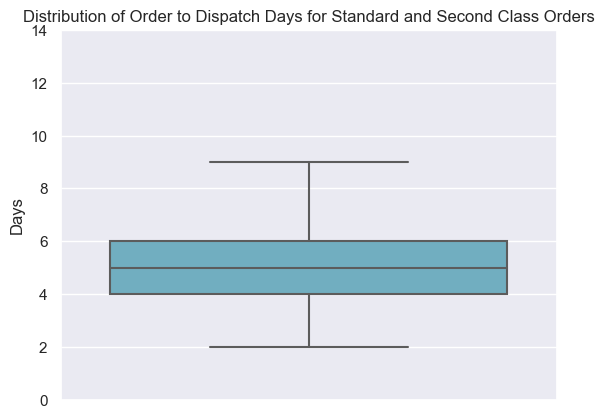

In [175]:
# exploring the distribution of the order_to_dispatch_days - standard and second class orders

sns.set_theme(style="darkgrid")
chart = sns.boxplot(y = "order_to_dispatch_days", data = dispatched_data_standard, color = "c")

chart.set(xlabel = "", ylabel = "Days", title = "Distribution of Order to Dispatch Days for Standard and Second Class Orders")
plt.yticks(range(0, 16, 2), range(0, 16, 2))
chart.get_figure();

Pivot table to calculate the On-Time Ready to Ship Rate - Number of orders that were dispatched on schedule or ahead of schedule / Total number of orders dispatched - Express Orders

In [176]:
dispatched_data_express_pivot = pd.pivot_table(dispatched_data_express,
            values= ['order_id', 'dispatched_on_schedule'],
            index=('order_year'),
            aggfunc={'order_id':'count', 'dispatched_on_schedule':'sum'},
            margins=False)

dispatched_data_express_pivot

,dispatched_on_schedule,order_id
order_year,,
2019,202,289
2020,279,373


In [177]:
# Calculating the On-Time Ready to Ship Rate and adding the column to the pivot table

dispatched_data_express_pivot['On_Time_Ready_to_Ship_Rate'] = dispatched_data_express_pivot['dispatched_on_schedule'] / dispatched_data_express_pivot['order_id']
dispatched_data_express_pivot

,dispatched_on_schedule,order_id,On_Time_Ready_to_Ship_Rate
order_year,,,
2019,202,289,0.698962
2020,279,373,0.747989


In [178]:
# To confirm the number of orders that were dispatched on time as seen in thw pivot table
# dispatched_data_express.groupby([dispatched_data_express.order_to_dispatch_days <= 2]).count()['order_id']
# or
# dispatched_data_express.groupby(['order_year', 'order_to_dispatch_days']).count()['order_id']

On-Time Ready to Ship Rate for Express Orders - Viz

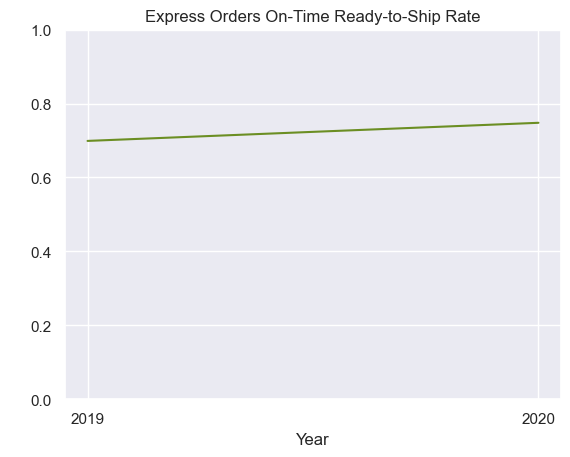

In [179]:
#fig, ax = plt.subplots(figsize=(6, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="order_year", 
                        y="On_Time_Ready_to_Ship_Rate",
                        data=dispatched_data_express_pivot,
                        errorbar=None,
                        color = "olivedrab"
                    )


chart.set(xlabel = "Year", ylabel = " ", title = "Express Orders On-Time Ready-to-Ship Rate")
#plt.yticks(range(0, 2), range(0, 2)) 
#plt.yticks((0, 1, 0.5), (0.0, 1.0, 0.5))
plt.yticks((0, 1, 0.2, 0.4, 0.6, 0.8), (0.0, 1.0, 0.2, 0.4, 0.6, 0.8)) 
plt.show(chart)


Result: On time ready to ship rate is below 0.8 and has slightly increased in year 2020

For monthly viz

In [180]:
dispatched_monthly_express_pivot = pd.pivot_table(dispatched_data_express,
            values= ['order_id', 'dispatched_on_schedule'],
            index=('order_month_year'),
            aggfunc={'order_id':'count', 'dispatched_on_schedule':'sum'},
            margins=False)

dispatched_monthly_express_pivot

,dispatched_on_schedule,order_id
order_month_year,,
2019-01,4,5
2019-02,8,9
2019-03,17,21
2019-04,9,15
2019-05,19,25
2019-06,18,25
2019-07,21,25
2019-08,16,20
2019-09,26,37


In [181]:
# Calculating the On-Time Ready to Ship Rate and adding the column to the pivot table

dispatched_monthly_express_pivot['On_Time_Ready_to_Ship_Rate'] = dispatched_monthly_express_pivot['dispatched_on_schedule'] / dispatched_monthly_express_pivot['order_id']
dispatched_monthly_express_pivot

,dispatched_on_schedule,order_id,On_Time_Ready_to_Ship_Rate
order_month_year,,,
2019-01,4,5,0.800000
2019-02,8,9,0.888889
2019-03,17,21,0.809524
2019-04,9,15,0.600000
2019-05,19,25,0.760000
2019-06,18,25,0.720000
2019-07,21,25,0.840000
2019-08,16,20,0.800000
2019-09,26,37,0.702703


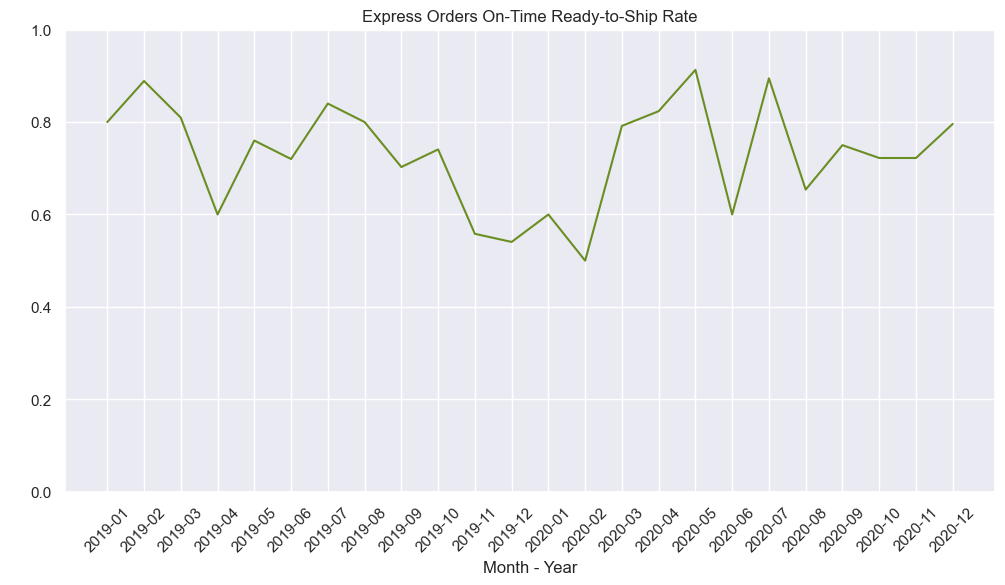

In [182]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="order_month_year", 
                        y="On_Time_Ready_to_Ship_Rate",
                        data=dispatched_monthly_express_pivot,
                        errorbar=None,
                        color = "olivedrab"
                    )


chart.set(xlabel = "Month - Year", ylabel = " ", title = "Express Orders On-Time Ready-to-Ship Rate")
#chart.set_xticklabels(labels = "order_month_year", rotation = 30)

plt.xticks(rotation=45)
#plt.yticks(range(0, 2), range(0, 2)) 
#plt.yticks((0, 1, 0.5), (0.0, 1.0, 0.5))
plt.yticks((0, 1, 0.2, 0.4, 0.6, 0.8), (0.0, 1.0, 0.2, 0.4, 0.6, 0.8)) 
plt.show(chart)


Pivot table to calculate the On-Time Ready to Ship Rate - Number of orders that were dispatched on schedule or ahead of schedule / Total number of orders dispatched - Standard Orders

In [183]:
dispatched_data_standard_pivot = pd.pivot_table(dispatched_data_standard,
            values= ['order_id', 'dispatched_on_schedule'],
            index=('order_year'),
            aggfunc={'order_id':'count', 'dispatched_on_schedule':'sum'},
            margins=False)

dispatched_data_standard_pivot

,dispatched_on_schedule,order_id
order_year,,
2019,331,1026
2020,451,1314


In [184]:
# Calculating the On-Time Ready to Ship Rate and adding the column to the pivot table

dispatched_data_standard_pivot['On_Time_Ready_to_Ship_Rate'] = dispatched_data_standard_pivot['dispatched_on_schedule'] / dispatched_data_standard_pivot['order_id']
dispatched_data_standard_pivot

,dispatched_on_schedule,order_id,On_Time_Ready_to_Ship_Rate
order_year,,,
2019,331,1026,0.322612
2020,451,1314,0.343227


In [185]:
# To confirm the number of orders that were dispatched on time as seen in thw pivot table
# dispatched_data_standard.groupby([dispatched_data_standard.order_to_dispatch_days <= 4]).count()['order_id']
# or
# dispatched_data_express.groupby(['order_year', 'order_to_dispatch_days']).count()['order_id']

On-Time Ready to Ship Rate for Standard Orders - Viz

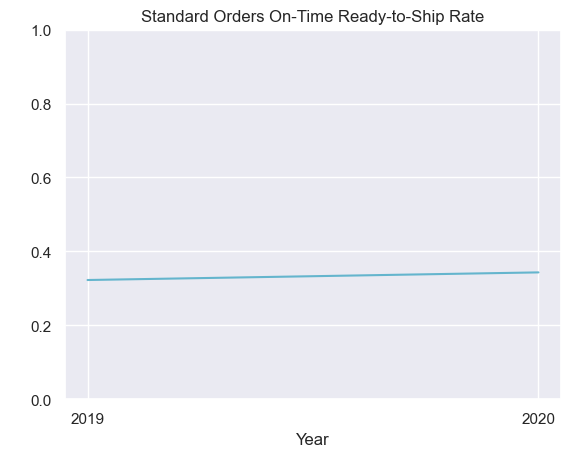

In [186]:
#fig, ax = plt.subplots(figsize=(6, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="order_year", 
                        y="On_Time_Ready_to_Ship_Rate",
                        data=dispatched_data_standard_pivot,
                        errorbar=None,
                        color = "c"
                    )


chart.set(xlabel = "Year", ylabel = " ", title = "Standard Orders On-Time Ready-to-Ship Rate")
#plt.yticks(range(0, 2), range(0, 2)) 
plt.yticks((0, 1, 0.2, 0.4, 0.6, 0.8), (0.0, 1.0, 0.2, 0.4, 0.6, 0.8)) 
plt.show(chart)

Result: On time ready to ship rate for standard orders is less than 0.4. Significantly low and could be the reason why many standard orders are delivered late.

For Monthly Viz

In [187]:
dispatched_monthly_standard_pivot = pd.pivot_table(dispatched_data_standard,
            values= ['order_id', 'dispatched_on_schedule'],
            index=('order_month_year'),
            aggfunc={'order_id':'count', 'dispatched_on_schedule':'sum'},
            margins=False)

dispatched_monthly_standard_pivot

,dispatched_on_schedule,order_id
order_month_year,,
2019-01,16,43
2019-02,15,36
2019-03,28,65
2019-04,15,74
2019-05,32,83
2019-06,30,72
2019-07,19,71
2019-08,26,70
2019-09,48,155


In [188]:
# Calculating the On-Time Ready to Ship Rate and adding the column to the pivot table

dispatched_monthly_standard_pivot['On_Time_Ready_to_Ship_Rate'] = dispatched_monthly_standard_pivot['dispatched_on_schedule'] / dispatched_monthly_standard_pivot['order_id']
dispatched_monthly_standard_pivot

,dispatched_on_schedule,order_id,On_Time_Ready_to_Ship_Rate
order_month_year,,,
2019-01,16,43,0.372093
2019-02,15,36,0.416667
2019-03,28,65,0.430769
2019-04,15,74,0.202703
2019-05,32,83,0.385542
2019-06,30,72,0.416667
2019-07,19,71,0.267606
2019-08,26,70,0.371429
2019-09,48,155,0.309677


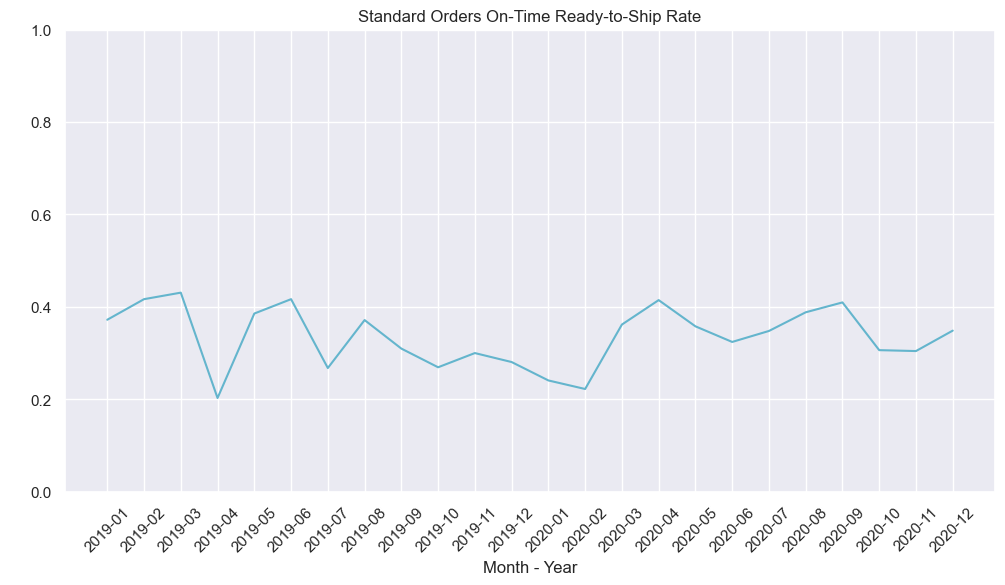

In [189]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="order_month_year", 
                        y="On_Time_Ready_to_Ship_Rate",
                        data=dispatched_monthly_standard_pivot,
                        errorbar=None,
                        color = "c"
                    )


chart.set(xlabel = "Month - Year", ylabel = " ", title = "Standard Orders On-Time Ready-to-Ship Rate")
#chart.set_xticklabels(labels = "order_month_year", rotation = 30)

plt.xticks(rotation=45)
#plt.yticks(range(0, 2), range(0, 2)) 
#plt.yticks((0, 1, 0.5), (0.0, 1.0, 0.5))
plt.yticks((0, 1, 0.2, 0.4, 0.6, 0.8), (0.0, 1.0, 0.2, 0.4, 0.6, 0.8)) 
plt.show(chart)


## KPI 5: On-Time Delivery Rate

On-Time Delivery Rate = Number of orders that were delivered on schedule or ahead of schedule / Total number of orders delivered

On-Time Delivery - Delivery carried out within **3 days** of the orders leaving the warehouse on truck.

**3 days** was promised by the logistics company (no difference between express and standard order delivery)

DataFrames required - on_truck_scan_data and delivery_date_data

DataFrames already merged as 'delivery_time_data' for KPI 3

In [190]:
delivery_time_data.head(2)

,order_id,order_date,delivery_year,delivery_month_year,on_truck_scan_date,arrival_scan_date,delivery_days,ship_mode,customer_name
0,CA-2019-152156,2019-11-08,2019,2019-11,2019-11-13,2019-11-18,3,Standard Processing,Claire Gute
1,CA-2019-117590,2019-12-08,2019,2019-12,2019-12-11,2019-12-16,3,Express,Gene Hale


In [191]:
delivery_time_data.shape

(333, 9)

In [192]:
# Identifying orders that were delivered on schedule and assigning 1 in a new column 'delivered_on_schedule' ( <= 3days) - both for express and standard orders
delivery_time_data['delivered_on_schedule'] = np.where(delivery_time_data['delivery_days'] <= 3, 1, 0)
delivery_time_data.head(3)

,order_id,order_date,delivery_year,delivery_month_year,on_truck_scan_date,arrival_scan_date,delivery_days,ship_mode,customer_name,delivered_on_schedule
0,CA-2019-152156,2019-11-08,2019,2019-11,2019-11-13,2019-11-18,3,Standard Processing,Claire Gute,1
1,CA-2019-117590,2019-12-08,2019,2019-12,2019-12-11,2019-12-16,3,Express,Gene Hale,1
2,CA-2019-106075,2019-09-18,2019,2019-09,2019-09-25,2019-09-30,3,Standard Processing,Henry MacAllister,1


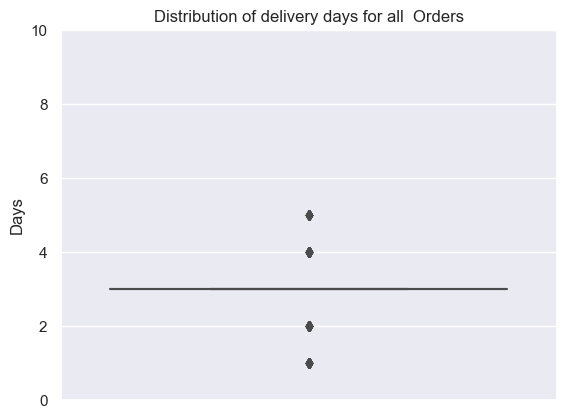

In [193]:
# exploring the distribution of the delivery_days - both express and standard orders

sns.set_theme(style="darkgrid")
chart = sns.boxplot(y = "delivery_days", data = delivery_time_data, color = "goldenrod")

chart.set(xlabel = "", ylabel = "Days", title = "Distribution of delivery days for all  Orders")
plt.yticks(range(0, 12, 2), range(0, 12, 2))
chart.get_figure();

Pivot table to calculate the On-Time Delivery Rate - Number of orders that were delivered on schedule or ahead of schedule / Total number of orders delivered - All Orders

In [194]:
delivery_time_pivot = pd.pivot_table(delivery_time_data,
            values= ['order_id', 'delivered_on_schedule'],
            index=('delivery_year'),
            aggfunc={'order_id':'count', 'delivered_on_schedule':'sum'},
            margins=False)

delivery_time_pivot

,delivered_on_schedule,order_id
delivery_year,,
2019,216,267
2020,52,66


In [195]:
# Calculating the On-Time Delivery Rate and adding the column to the pivot table

delivery_time_pivot['On_Time_Delivery_Rate'] = delivery_time_pivot['delivered_on_schedule'] / delivery_time_pivot['order_id']
delivery_time_pivot

,delivered_on_schedule,order_id,On_Time_Delivery_Rate
delivery_year,,,
2019,216,267,0.808989
2020,52,66,0.787879


Delivery Rate Viz

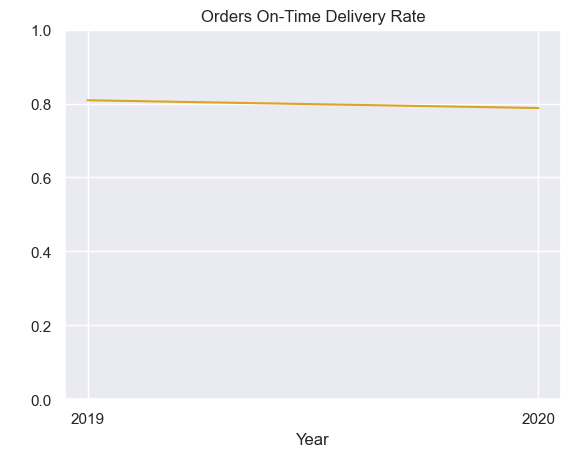

In [196]:
#fig, ax = plt.subplots(figsize=(12, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="delivery_year", 
                        y="On_Time_Delivery_Rate",
                        data=delivery_time_pivot,
                        errorbar=None,
                        color = "goldenrod"
                    )


chart.set(xlabel = "Year", ylabel = " ", title = "Orders On-Time Delivery Rate")
#chart.set_xticklabels(labels = "order_month_year", rotation = 30)

#plt.xticks(rotation=45)
#plt.yticks(range(0, 2), range(0, 2)) 
#plt.yticks((0, 1, 0.5), (0.0, 1.0, 0.5))
plt.yticks((0, 1, 0.2, 0.4, 0.6, 0.8), (0.0, 1.0, 0.2, 0.4, 0.6, 0.8)) 
plt.show(chart)

For Monthly Viz

In [197]:
delivery_time_pivot = pd.pivot_table(delivery_time_data,
            values= ['order_id', 'delivered_on_schedule'],
            index=('delivery_month_year'),
            aggfunc={'order_id':'count', 'delivered_on_schedule':'sum'},
            margins=False)

delivery_time_pivot

,delivered_on_schedule,order_id
delivery_month_year,,
2019-04,0,3
2019-05,56,71
2019-06,8,8
2019-09,49,58
2019-10,36,42
2019-11,39,48
2019-12,28,37
2020-01,23,25
2020-02,6,9


In [198]:
# Calculating the On-Time Delivery Rate and adding the column to the pivot table

delivery_time_pivot['On_Time_Delivery_Rate'] = delivery_time_pivot['delivered_on_schedule'] / delivery_time_pivot['order_id']
delivery_time_pivot

,delivered_on_schedule,order_id,On_Time_Delivery_Rate
delivery_month_year,,,
2019-04,0,3,0.000000
2019-05,56,71,0.788732
2019-06,8,8,1.000000
2019-09,49,58,0.844828
2019-10,36,42,0.857143
2019-11,39,48,0.812500
2019-12,28,37,0.756757
2020-01,23,25,0.920000
2020-02,6,9,0.666667


On-Time Delivery Rate for All Orders - Viz

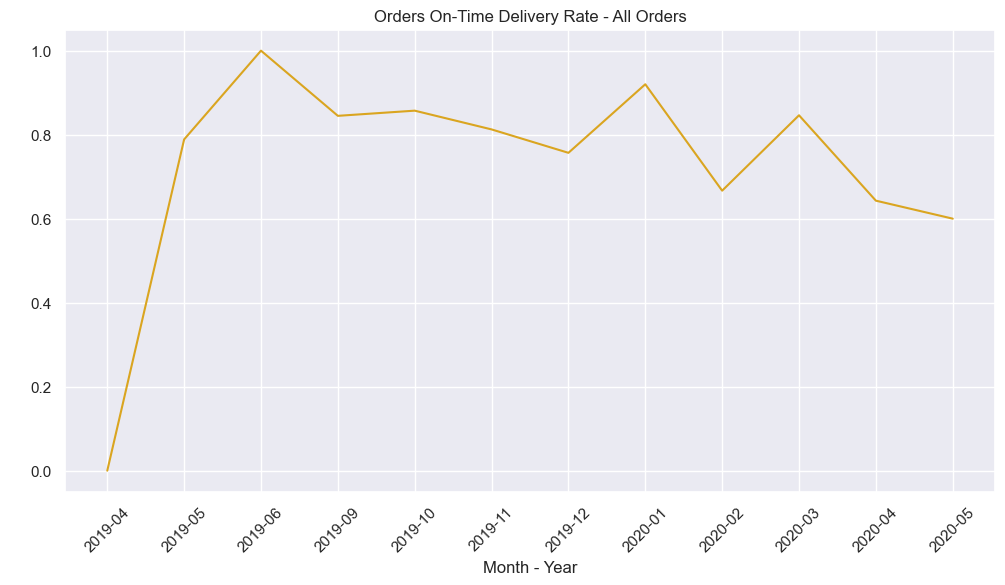

In [199]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="delivery_month_year", 
                        y="On_Time_Delivery_Rate",
                        data=delivery_time_pivot,
                        errorbar=None,
                        color = "goldenrod"
                    )


chart.set(xlabel = "Month - Year", ylabel = " ", title = "Orders On-Time Delivery Rate - All Orders")
#chart.set_xticklabels(labels = "order_month_year", rotation = 30)

plt.xticks(rotation=45)
#plt.yticks(range(0, 2), range(0, 2)) 
#plt.yticks((0, 1, 0.5), (0.0, 1.0, 0.5))
plt.yticks((0, 1, 0.2, 0.4, 0.6, 0.8), (0.0, 1.0, 0.2, 0.4, 0.6, 0.8)) 
plt.show(chart)

## Further Analysis

## 1 - Correlation Matrix

DataFrames required - orders_data, ready_to_ship_data, on_truck_scan_data and delivery_date_data

In [200]:
# Merging the two full DataFrames first

order_shipment_data = pd.merge(orders_data, on_truck_scan_data, on= "order_id", how = 'inner')
order_shipment_data.head(2)

,index,order_id,order_date_x,ship_mode_x,customer_id,customer_name,origin_channel,country_region,city,state,...,sub_category,product_id,sales,quantity,discount,profit,row_id,order_date_y,on_truck_scan_date,ship_mode_y
0,1,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,...,With Fruit,FUR-BO-10001798,261.96,2,0.0,41.9136,1,2019-11-08,2019-11-13,Standard Processing
1,3,CA-2019-138688,2019-06-12,Second Class,DV-13045,Darrin Van Huff,Sales,United States,Los Angeles,California,...,No Taste All Power,OFF-LA-10000240,14.62,2,0.0,6.8714,3,2019-06-12,2019-06-19,Standard Processing


In [201]:
order_shipment_data.shape

(3002, 23)

In [202]:
# Merging to delivery_date_data

order_shipment_delivery_data = pd.merge(order_shipment_data, delivery_date_data, on= "order_id", how = 'inner')
order_shipment_delivery_data.head(2)

,index,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,origin_channel,country_region,city,state,...,sales,quantity,discount,profit,row_id,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y
0,1,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,...,261.960,2,0.0,41.9136,1,2019-11-08,2019-11-13,Standard Processing,2019-11-18,Claire Gute
1,36,CA-2019-117590,2019-12-08,First Class,GH-14485,Gene Hale,Sales,United States,Richardson,Texas,...,1097.544,7,0.2,123.4737,36,2019-12-08,2019-12-11,Express,2019-12-16,Gene Hale


In [203]:
order_shipment_delivery_data.shape

(333, 25)

In [204]:
# Merging to ready_to_ship_data

all_data = pd.merge(order_shipment_delivery_data, ready_to_ship_data, on= "order_id", how = 'inner')
all_data.head(2)

,index,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,origin_channel,country_region,city,state,...,discount,profit,row_id,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date
0,99,CA-2019-149223,2019-09-06,Standard Class,ER-13855,Elpida Rittenbach,Sales,United States,Saint Paul,Minnesota,...,0.0,22.5852,99,2019-09-06,2019-09-13,Standard Processing,2019-09-17,Elpida Rittenbach,2019-09-11,2019-09-13
1,251,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,0.0,3.5767,251,2019-09-11,2019-09-18,Standard Processing,2019-09-23,Kelly Collister,2019-09-17,2019-09-18


In [205]:
all_data.shape

(22, 27)

Adding the day difference columns

In [206]:
#all_data.columns

In [207]:
all_data['order_lead_time'] = np.busday_count(all_data['order_date_x'].values.astype('datetime64[D]'), 
                                              all_data['arrival_scan_date'].values.astype('datetime64[D]'))
all_data.head(2)

,index,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,origin_channel,country_region,city,state,...,profit,row_id,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date,order_lead_time
0,99,CA-2019-149223,2019-09-06,Standard Class,ER-13855,Elpida Rittenbach,Sales,United States,Saint Paul,Minnesota,...,22.5852,99,2019-09-06,2019-09-13,Standard Processing,2019-09-17,Elpida Rittenbach,2019-09-11,2019-09-13,7
1,251,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,3.5767,251,2019-09-11,2019-09-18,Standard Processing,2019-09-23,Kelly Collister,2019-09-17,2019-09-18,8


In [208]:
all_data['order_cycle_days'] = np.busday_count(all_data['order_date_x'].values.astype('datetime64[D]'), 
                                               all_data['ready_to_ship_date'].values.astype('datetime64[D]'))
all_data.tail(3)

,index,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,origin_channel,country_region,city,state,...,row_id,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date,order_lead_time,order_cycle_days
19,9281,CA-2019-166772,2019-09-20,Standard Class,HJ-14875,Heather Jas,Facebook,United States,Seattle,Washington,...,9281,2019-09-20,2019-09-25,Standard Processing,2019-09-30,Heather Jas,2019-09-24,2019-09-25,6,2
20,9929,CA-2019-129630,2019-09-04,First Class,IM-15055,Ionia McGrath,Email,United States,San Francisco,California,...,9929,2019-09-04,2019-09-04,Express,2019-09-09,Ionia McGrath,2019-09-04,2019-09-04,3,0
21,9973,CA-2019-130225,2019-09-11,Standard Class,RC-19960,Ryan Crowe,Email,United States,Houston,Texas,...,9973,2019-09-11,2019-09-18,Standard Processing,2019-09-23,Ryan Crowe,2019-09-17,2019-09-18,8,4


In [209]:
all_data['delivery_days'] = np.busday_count(all_data['on_truck_scan_date'].values.astype('datetime64[D]'), 
                                            all_data['arrival_scan_date'].values.astype('datetime64[D]'))
all_data.head(3)

,index,order_id,order_date_x,ship_mode_x,customer_id,customer_name_x,origin_channel,country_region,city,state,...,order_date_y,on_truck_scan_date,ship_mode_y,arrival_scan_date,customer_name_y,ready_to_ship_date,pickup_date,order_lead_time,order_cycle_days,delivery_days
0,99,CA-2019-149223,2019-09-06,Standard Class,ER-13855,Elpida Rittenbach,Sales,United States,Saint Paul,Minnesota,...,2019-09-06,2019-09-13,Standard Processing,2019-09-17,Elpida Rittenbach,2019-09-11,2019-09-13,7,3,2
1,251,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,2019-09-11,2019-09-18,Standard Processing,2019-09-23,Kelly Collister,2019-09-17,2019-09-18,8,4,3
2,613,CA-2019-121223,2019-09-11,Second Class,GD-14590,Giulietta Dortch,Sales,United States,Philadelphia,Pennsylvania,...,2019-09-11,2019-09-16,Standard Processing,2019-09-19,Giulietta Dortch,2019-09-13,2019-09-16,6,2,3


In [210]:
all_data.columns

Index(['index', 'order_id', 'order_date_x', 'ship_mode_x', 'customer_id',
       'customer_name_x', 'origin_channel', 'country_region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub_category', 'product_id',
       'sales', 'quantity', 'discount', 'profit', 'row_id', 'order_date_y',
       'on_truck_scan_date', 'ship_mode_y', 'arrival_scan_date',
       'customer_name_y', 'ready_to_ship_date', 'pickup_date',
       'order_lead_time', 'order_cycle_days', 'delivery_days'],
      dtype='object')

In [211]:
# Dropping unnecessary columns

all_data = all_data.drop([    'index',
                                            'customer_name_x',
                                            'origin_channel',
                                            'country_region',
                                            'pickup_date',
                                            'city',
                                            'state',
                                            'postal_code',
                                            'region',
                                            'category',
                                            'sub_category', 
                                            'product_id',
                                            'row_id',
                                            'order_date_y',
                                            'ship_mode_y',
                                            'customer_name_y'], 
                                             axis=1)
all_data.head(2)

,order_id,order_date_x,ship_mode_x,customer_id,sales,quantity,discount,profit,on_truck_scan_date,arrival_scan_date,ready_to_ship_date,order_lead_time,order_cycle_days,delivery_days
0,CA-2019-149223,2019-09-06,Standard Class,ER-13855,77.88,6,0.0,22.5852,2019-09-13,2019-09-17,2019-09-11,7,3,2
1,CA-2019-145625,2019-09-11,Standard Class,KC-16540,7.61,1,0.0,3.5767,2019-09-18,2019-09-23,2019-09-17,8,4,3


In [212]:
# Reordering columns

all_data = all_data[[   "order_id",
                        "order_date_x",
                        "ready_to_ship_date",
                        "order_cycle_days",
                        "on_truck_scan_date",
                        "arrival_scan_date",
                        "delivery_days",
                        "order_lead_time",
                        "sales",
                        "quantity",
                        "discount",
                        "profit"]]

all_data.head(2)

,order_id,order_date_x,ready_to_ship_date,order_cycle_days,on_truck_scan_date,arrival_scan_date,delivery_days,order_lead_time,sales,quantity,discount,profit
0,CA-2019-149223,2019-09-06,2019-09-11,3,2019-09-13,2019-09-17,2,7,77.88,6,0.0,22.5852
1,CA-2019-145625,2019-09-11,2019-09-17,4,2019-09-18,2019-09-23,3,8,7.61,1,0.0,3.5767


In [213]:
all_data.rename(columns={'order_date_x': 'order_date',
                         'order_cycle_days': 'Order Cycle (days)',
                         'delivery_days': 'Delivery Time (days)',
                         'order_lead_time': 'Order Lead Time (days)',
                         'sales': 'Sales',
                         'quantity': 'Quantity',
                         'discount': 'Discount',
                         'profit': 'Profit'}, 
                         inplace=True)
all_data.head(2)

,order_id,order_date,ready_to_ship_date,Order Cycle (days),on_truck_scan_date,arrival_scan_date,Delivery Time (days),Order Lead Time (days),Sales,Quantity,Discount,Profit
0,CA-2019-149223,2019-09-06,2019-09-11,3,2019-09-13,2019-09-17,2,7,77.88,6,0.0,22.5852
1,CA-2019-145625,2019-09-11,2019-09-17,4,2019-09-18,2019-09-23,3,8,7.61,1,0.0,3.5767


In [214]:
all_data.corr(method = 'pearson', min_periods = 1)

,Order Cycle (days),Delivery Time (days),Order Lead Time (days),Sales,Quantity,Discount,Profit
Order Cycle (days),1.000000,-0.200810,0.856424,-0.069458,-0.187561,0.022564,0.099976
Delivery Time (days),-0.200810,1.000000,0.126030,0.071041,-0.106577,-0.170688,-0.109283
Order Lead Time (days),0.856424,0.126030,1.000000,-0.082237,-0.161107,-0.142646,0.084576
Sales,-0.069458,0.071041,-0.082237,1.000000,0.307674,0.460502,-0.854451
Quantity,-0.187561,-0.106577,-0.161107,0.307674,1.000000,-0.007551,-0.146459
Discount,0.022564,-0.170688,-0.142646,0.460502,-0.007551,1.000000,-0.608315
Profit,0.099976,-0.109283,0.084576,-0.854451,-0.146459,-0.608315,1.000000


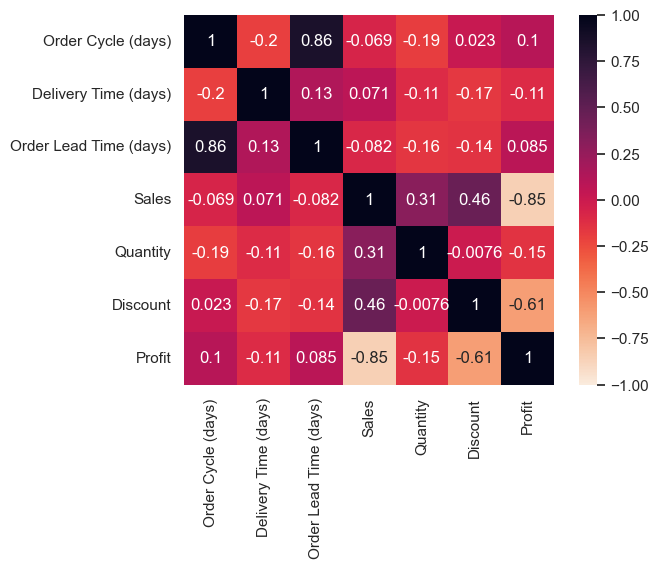

In [215]:
corr = all_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, annot=True,
    cmap = sns.color_palette("rocket_r", as_cmap=True),
    square=True
)


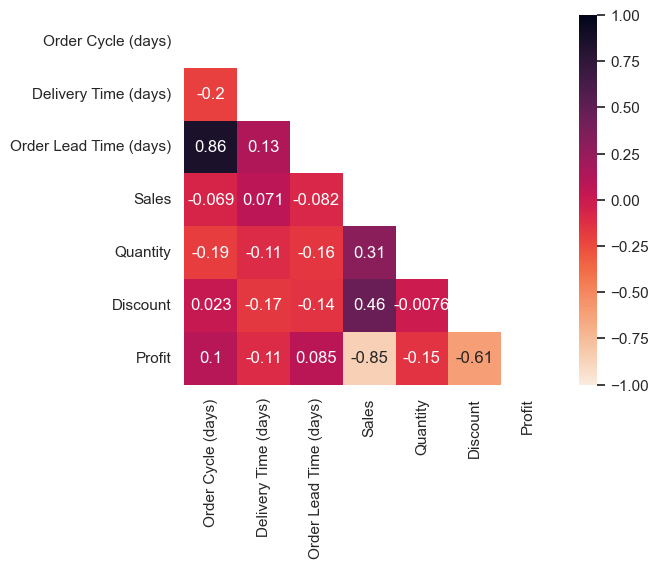

In [216]:
sns.set_theme(style="white")
corr = all_data.corr() #correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool)) #to generate a mask for the upper triangle
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1, square=True, annot=True);

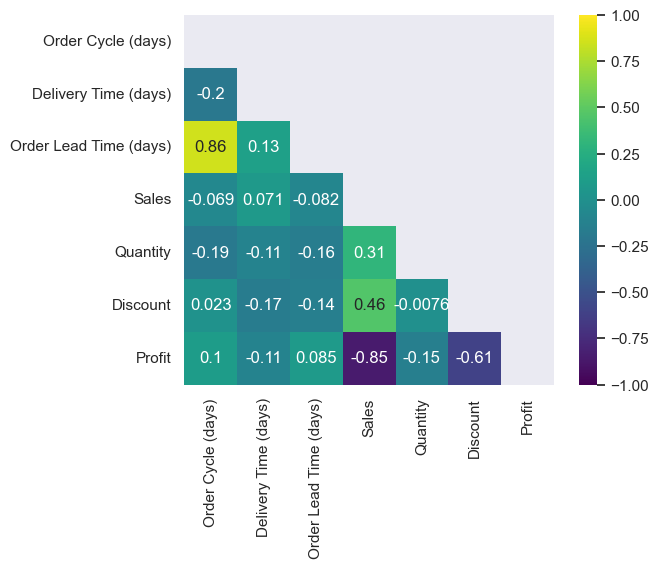

In [217]:
sns.set_theme(style="darkgrid")
corr = all_data.corr() #correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool)) #to generate a mask for the upper triangle
cmap = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, vmin=-1, square=True, annot=True);

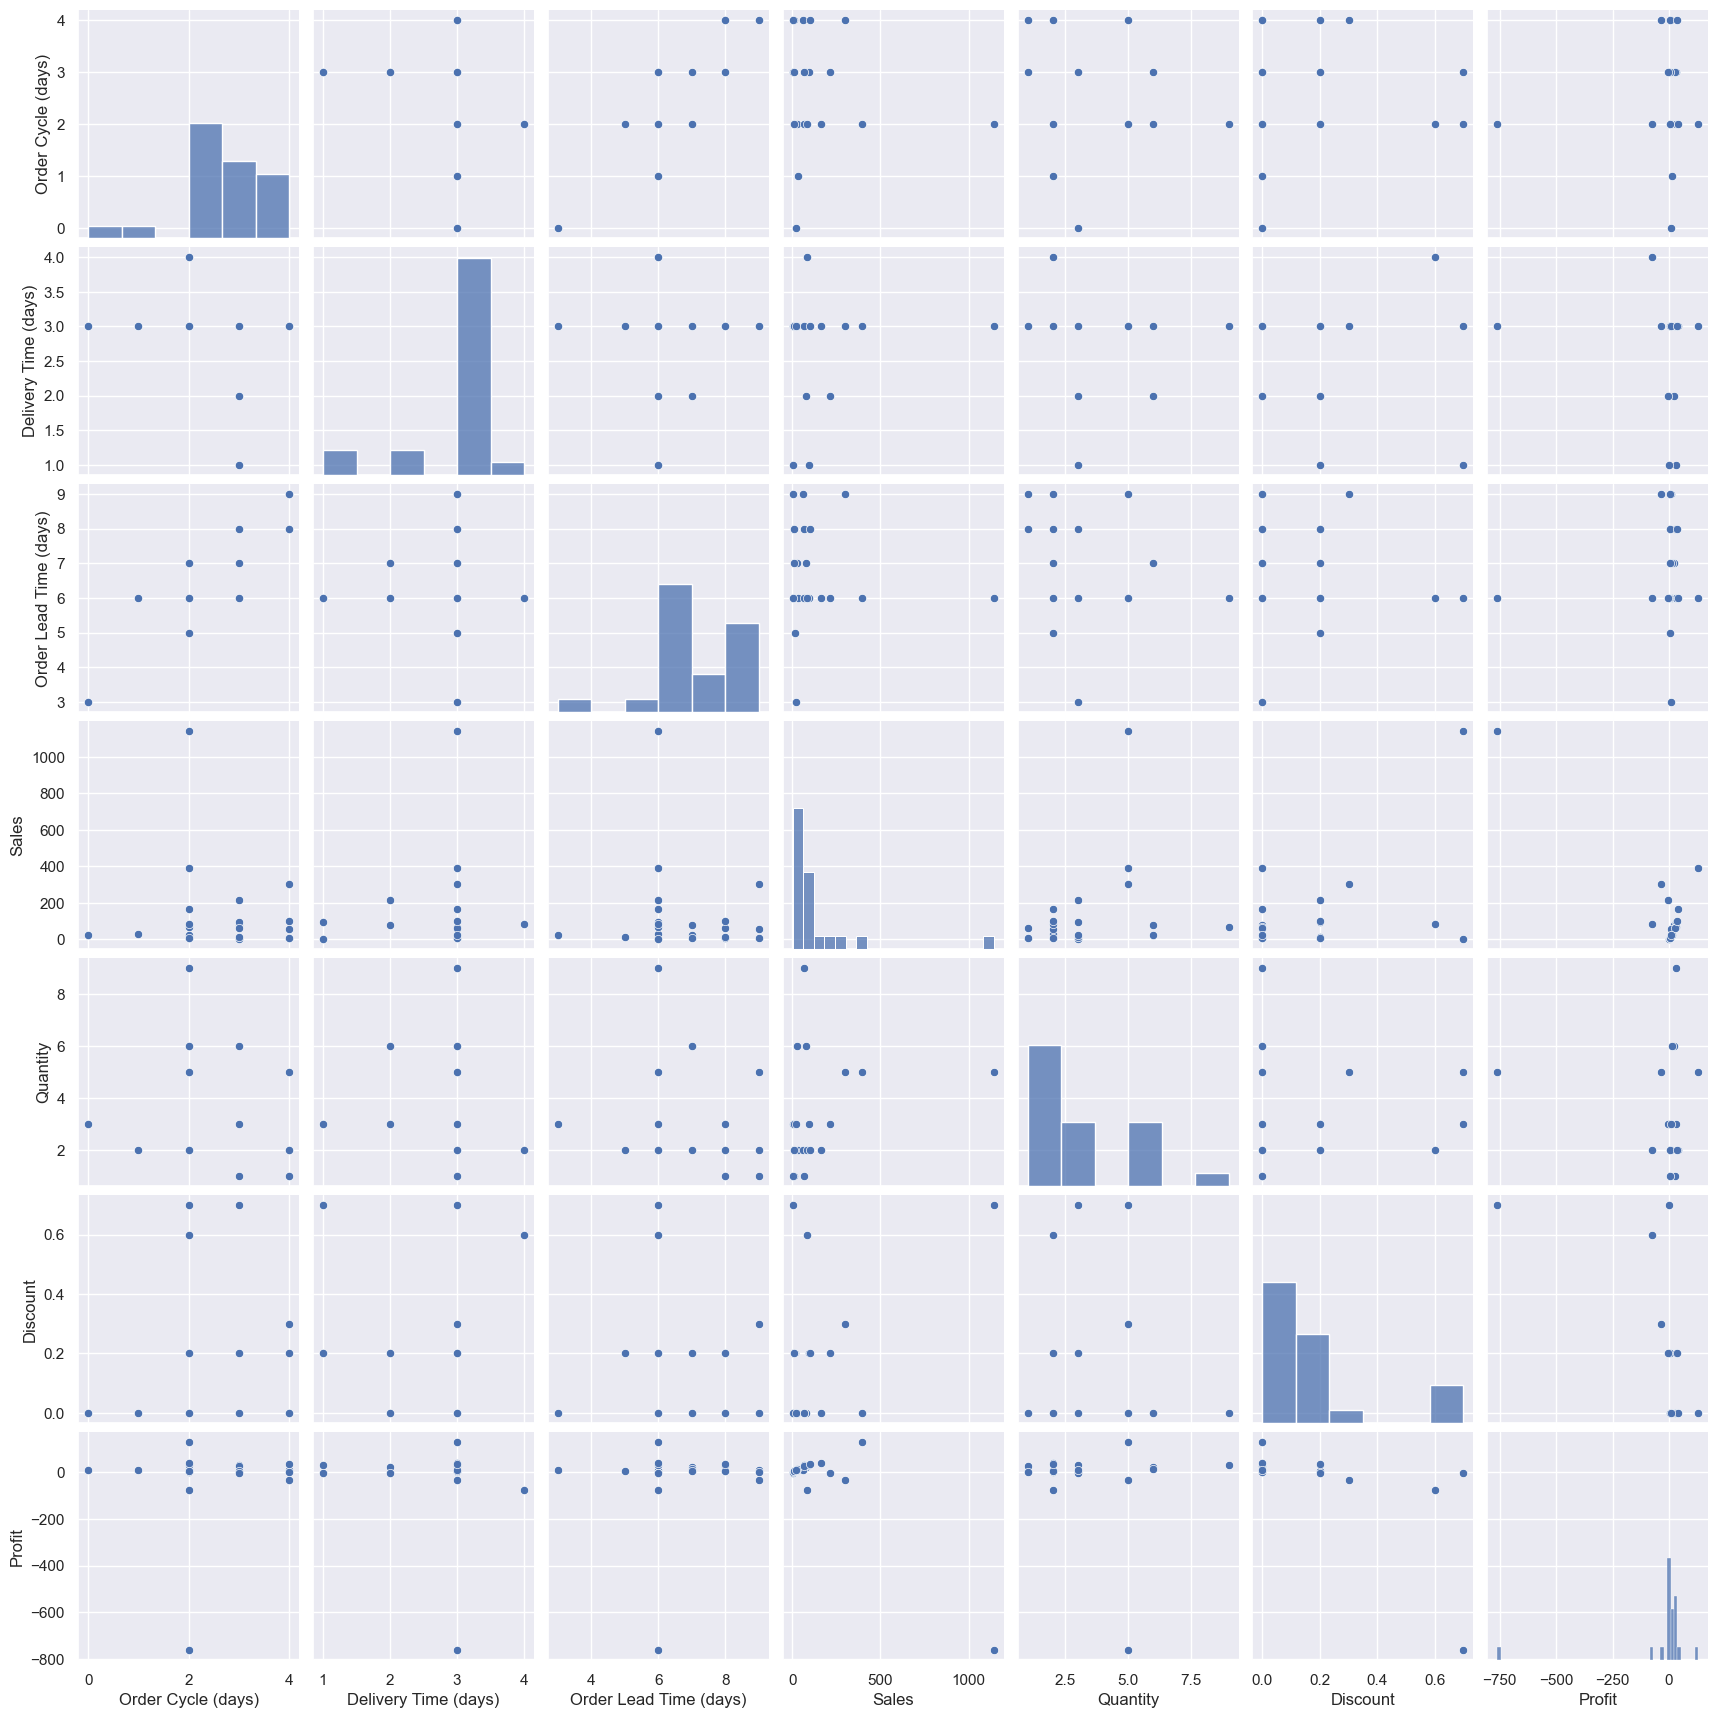

In [218]:
sns.pairplot(all_data);

Linear regression

In [219]:
X = all_data[['Order Lead Time (days)']]
y = all_data[['Order Cycle (days)']]

display(X.head())
display(y.head())

,Order Lead Time (days)
0,7
1,8
2,6
3,6
4,5


,Order Cycle (days)
0,3
1,4
2,2
3,2
4,2


In [220]:
import statsmodels.api as sm

X = sm.add_constant(X)
display(X.head())

,const,Order Lead Time (days)
0,1.0,7
1,1.0,8
2,1.0,6
3,1.0,6
4,1.0,5


In [221]:
#'const' (intercept) and 'slope' of the regression equation.

our_model = sm.OLS(y, X)
model_results = our_model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Order Cycle (days)   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     55.04
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           3.66e-07
Time:                        23:10:51   Log-Likelihood:                -17.312
No. Observations:                  22   AIC:                             38.62
Df Residuals:                      20   BIC:                             40.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.5861      0.575     -2.756      0.012      -2.786      -0.386
Order Lead Time (days)     0.6209      0.084      7.419      0.000       0.446       0.795
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   2.601
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.224
Skew:                           0.002   Prob(JB):                        0.894
Kurtosis:                       2.506   Cond. No.                         34.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
intercept, slope = model_results.params
print(f'intercept: {intercept}, slope: {slope}')

intercept: -1.5860655737704943, slope: 0.6209016393442625


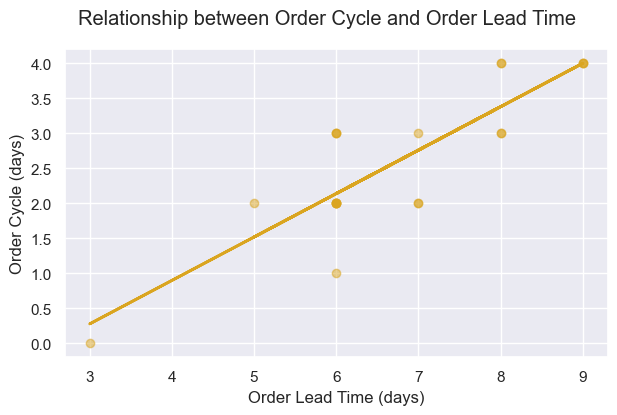

In [223]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.set_theme(style="darkgrid")

x = all_data['Order Lead Time (days)']
y = all_data['Order Cycle (days)']

ax.scatter(x, y, alpha=0.5, color='goldenrod')
fig.suptitle('Relationship between Order Cycle and Order Lead Time')

ax.plot(x, x*slope+intercept, '-', color='goldenrod', linewidth=2);
ax.set_ylabel("Order Cycle (days)");
ax.set_xlabel("Order Lead Time (days)");

R_Squared = 0.733

73% of the variation in Order Cycle data is explained by the model

P > |t| = 0.000

Less than the confidence level - 0.05

There is a statistically significant relationship between the order lead time and the order cycle

## 2 - Order Lead Time by Day of the Week

In [224]:
order_lead_time_data.head(2)

,order_id,order_year,order_month_year,order_date,arrival_scan_date,order_lead_time,ship_mode,customer_id,postal_code,city,state,region,country_region
0,CA-2019-152156,2019,2019-11,2019-11-08,2019-11-18,6,Second Class,CG-12520,42420,Henderson,Kentucky,South,United States
1,CA-2019-117590,2019,2019-12,2019-12-08,2019-12-16,5,First Class,GH-14485,75080,Richardson,Texas,Central,United States


In [225]:
order_lead_time_data['order_received_day'] = pd.to_datetime(order_lead_time_data['order_date']).dt.day_name()
order_lead_time_data.head(2)

,order_id,order_year,order_month_year,order_date,arrival_scan_date,order_lead_time,ship_mode,customer_id,postal_code,city,state,region,country_region,order_received_day
0,CA-2019-152156,2019,2019-11,2019-11-08,2019-11-18,6,Second Class,CG-12520,42420,Henderson,Kentucky,South,United States,Friday
1,CA-2019-117590,2019,2019-12,2019-12-08,2019-12-16,5,First Class,GH-14485,75080,Richardson,Texas,Central,United States,Sunday


Express Orders

In [226]:
# express_order_lead_time becomes a subset of order_lead_time_data containing express/first class shipping data

express_order_lead_time = order_lead_time_data[(order_lead_time_data.ship_mode == 'First Class')]
express_order_lead_time.head(2)

,order_id,order_year,order_month_year,order_date,arrival_scan_date,order_lead_time,ship_mode,customer_id,postal_code,city,state,region,country_region,order_received_day
1,CA-2019-117590,2019,2019-12,2019-12-08,2019-12-16,5,First Class,GH-14485,75080,Richardson,Texas,Central,United States,Sunday
5,CA-2019-162733,2019,2019-05,2019-05-11,2019-05-20,5,First Class,TT-21070,90045,Los Angeles,California,West,United States,Saturday


In [227]:
express_lead_time_day = express_order_lead_time.groupby('order_received_day', as_index = False)['order_lead_time'].mean().sort_values('order_lead_time', ascending = True)
express_lead_time_day

,order_received_day,order_lead_time
4,Thursday,4.333333
0,Friday,4.500000
2,Saturday,4.500000
5,Tuesday,4.714286
6,Wednesday,4.875000
3,Sunday,5.058824
1,Monday,5.062500


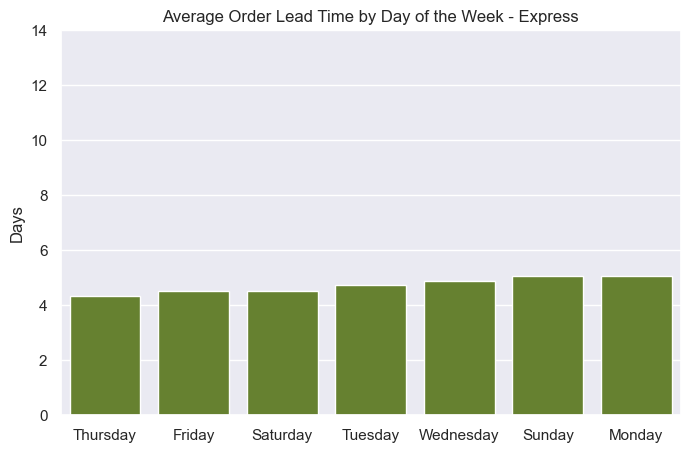

In [228]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.set_theme(style="darkgrid")
chart = sns.barplot(   x="order_received_day", 
                        y="order_lead_time",
                        data=express_lead_time_day,
                        #errorbar=None,
                        color = "olivedrab"
                    )


chart.set(xlabel = "", ylabel = "Days", title = "Average Order Lead Time by Day of the Week - Express")
plt.yticks(range(0, 16, 2), range(0, 16, 2)) 
plt.show(chart)

Standard Orders

In [229]:
# standard_order_lead_time becomes a subset of order_lead_time_data containing Second Class and Standard Class/Standard Processing data

standard_order_lead_time = order_lead_time_data[(order_lead_time_data.ship_mode == 'Second Class') |  
                                                (order_lead_time_data.ship_mode == 'Standard Class') ]
standard_order_lead_time.head(2)

,order_id,order_year,order_month_year,order_date,arrival_scan_date,order_lead_time,ship_mode,customer_id,postal_code,city,state,region,country_region,order_received_day
0,CA-2019-152156,2019,2019-11,2019-11-08,2019-11-18,6,Second Class,CG-12520,42420,Henderson,Kentucky,South,United States,Friday
2,CA-2019-106075,2019,2019-09,2019-09-18,2019-09-30,8,Standard Class,HM-14980,10009,New York City,New York,East,United States,Wednesday


In [230]:
standard_lead_time_day = standard_order_lead_time.groupby('order_received_day', as_index = False)['order_lead_time'].mean().sort_values('order_lead_time', ascending = True)
standard_lead_time_day

,order_received_day,order_lead_time
2,Saturday,6.750000
0,Friday,6.838710
4,Thursday,7.254902
6,Wednesday,8.048780
5,Tuesday,8.622222
3,Sunday,8.632653
1,Monday,9.567568


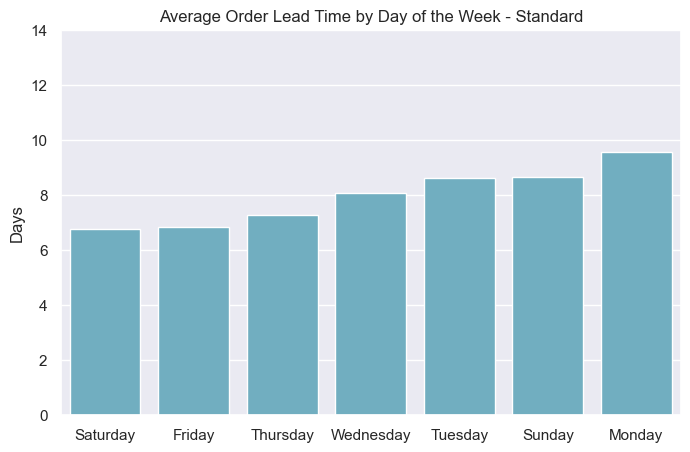

In [231]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.set_theme(style="darkgrid")
chart = sns.barplot(   x="order_received_day", 
                        y="order_lead_time",
                        data=standard_lead_time_day,
                        #errorbar=None,
                        color = "c"
                    )


chart.set(xlabel = "", ylabel = "Days", title = "Average Order Lead Time by Day of the Week - Standard")
plt.yticks(range(0, 16, 2), range(0, 16, 2)) 
plt.show(chart)

## 3 - Number of orders received on each day of the week

DataFrame required - orders_data

In [232]:
orders_data.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit
0,1,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420,South,Toasted Muesli,With Fruit,FUR-BO-10001798,261.96,2,0.0,41.9136
1,3,CA-2019-138688,2019-06-12,Second Class,DV-13045,Darrin Van Huff,Sales,United States,Los Angeles,California,90036,West,Power Muesli,No Taste All Power,OFF-LA-10000240,14.62,2,0.0,6.8714


In [233]:
# Adding order_received_day to the dataFrame

orders_data['order_received_day'] = pd.to_datetime(orders_data['order_date']).dt.day_name()
orders_data.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit,order_received_day
0,1,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420,South,Toasted Muesli,With Fruit,FUR-BO-10001798,261.96,2,0.0,41.9136,Friday
1,3,CA-2019-138688,2019-06-12,Second Class,DV-13045,Darrin Van Huff,Sales,United States,Los Angeles,California,90036,West,Power Muesli,No Taste All Power,OFF-LA-10000240,14.62,2,0.0,6.8714,Wednesday


Separating Express from Standard Orders

In [234]:
# Express orders
express_orders_data = orders_data[(orders_data.ship_mode == 'First Class')]
express_orders_data.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit,order_received_day
16,36,CA-2019-117590,2019-12-08,First Class,GH-14485,Gene Hale,Sales,United States,Richardson,Texas,75080,Central,Special Projects Muesil,Only Oats,TEC-PH-10004977,1097.544,7,0.2,123.4737,Sunday
21,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,Monday


In [235]:
# Standard orders

standard_orders_data = orders_data[(orders_data.ship_mode == 'Second Class') |  
                                   (orders_data.ship_mode == 'Standard Class') ]
standard_orders_data.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit,order_received_day
0,1,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420,South,Toasted Muesli,With Fruit,FUR-BO-10001798,261.96,2,0.0,41.9136,Friday
1,3,CA-2019-138688,2019-06-12,Second Class,DV-13045,Darrin Van Huff,Sales,United States,Los Angeles,California,90036,West,Power Muesli,No Taste All Power,OFF-LA-10000240,14.62,2,0.0,6.8714,Wednesday


In [236]:
express_orders_data.shape

(1051, 20)

In [237]:
order_count_per_day = express_orders_data.groupby('order_received_day', as_index = False)['order_id'].count().sort_values('order_id', ascending = False)
order_count_per_day

,order_received_day,order_id
4,Thursday,201
5,Tuesday,186
6,Wednesday,170
1,Monday,161
0,Friday,150
2,Saturday,92
3,Sunday,91


In [238]:
#order_count_per_day_pivot = pd.pivot_table(express_orders_data,
            #values= ['order_id'],
            #index= ('order_received_day'),
            #aggfunc={'order_id':'count'},
            #margins=False)

#order_count_per_day_pivot

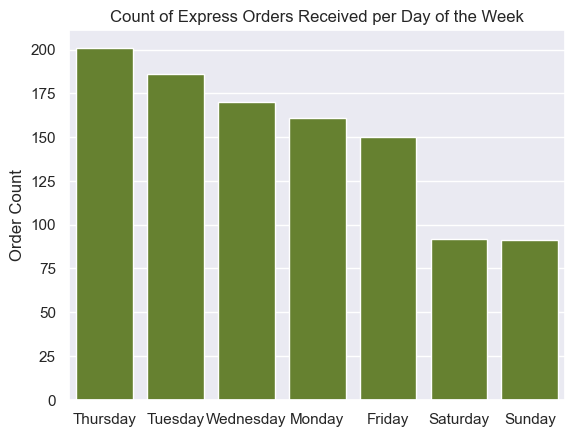

In [239]:
#fig, ax = plt.subplots(figsize=(10, 6))

sns.set_theme(style="darkgrid")
chart = sns.barplot(   x="order_received_day", 
                        y="order_id",
                        data=order_count_per_day,
                        #errorbar=None,
                        color = "olivedrab"
                    )


chart.set(xlabel = "", ylabel = "Order Count", title = "Count of Express Orders Received per Day of the Week")
#plt.yticks(range(0, 16, 2), range(0, 16, 2)) 
plt.show(chart)

In [240]:
standard_order_count_per_day = standard_orders_data.groupby('order_received_day', as_index = False)['order_id'].count().sort_values('order_id', ascending = False)
standard_order_count_per_day

,order_received_day,order_id
5,Tuesday,698
4,Thursday,684
6,Wednesday,676
0,Friday,640
1,Monday,569
2,Saturday,366
3,Sunday,325


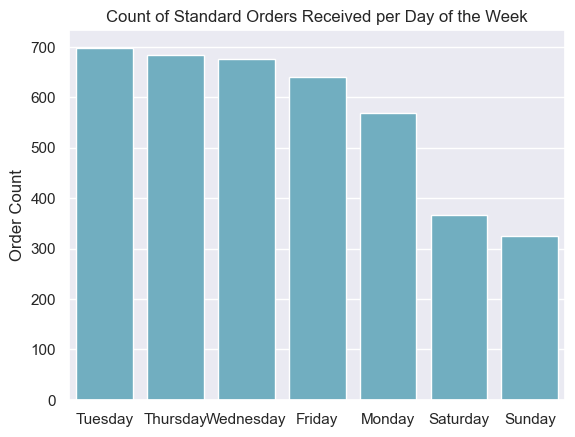

In [241]:
#fig, ax = plt.subplots(figsize=(10, 6))

sns.set_theme(style="darkgrid")
chart = sns.barplot(   x="order_received_day", 
                        y="order_id",
                        data=standard_order_count_per_day,
                        #errorbar=None,
                        color = "c"
                    )


chart.set(xlabel = "", ylabel = "Order Count", title = "Count of Standard Orders Received per Day of the Week")
#plt.yticks(range(0, 16, 2), range(0, 16, 2)) 
plt.show(chart)

## 4 - Profitable Channel

In [242]:
# importing orders table again since rows were dropped based on order_id in the first table.
orders_full_data = pd.read_csv('data/Muesli Project raw data - Orders.csv')

In [243]:
orders_full_data.head(2)

,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,8/11/2019,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420.0,South,Toasted Muesli,With Fruit,FUR-BO-10001798,261.96,2,0.0,41.9136
1,2,CA-2019-152156,8/11/2019,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420.0,South,Toasted Muesli,With Nuts,FUR-CH-10000454,731.94,3,0.0,219.5820


In [244]:
#changing column headers to snake_case
orders_full_data.columns = orders_full_data.columns.str.lower()
orders_full_data.columns = orders_full_data.columns.str.replace(" ", "_")
orders_full_data.columns

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country/region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub-category', 'product_id',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [245]:
#changing 'sub-category' column name to snake_case
orders_full_data.rename(columns = {'sub-category':'sub_category', 'country/region':'country_region'}, inplace = True)
orders_full_data.columns

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country_region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub_category', 'product_id',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [246]:
orders_full_data.shape

(9994, 19)

In [247]:
orders_full_data['order_date'] = pd.to_datetime(orders_full_data['order_date'], format='%d/%m/%Y', utc=False)
orders_full_data.order_date.head(2)

0   2019-11-08
1   2019-11-08
Name: order_date, dtype: datetime64[ns]

In [248]:
# Adding order_month_year to the dataFrame

orders_full_data['order_year'] = pd.to_datetime(orders_full_data['order_date']).dt.strftime('%Y')
orders_full_data.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,postal_code,region,category,sub_category,product_id,sales,quantity,discount,profit,order_year
0,1,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420.0,South,Toasted Muesli,With Fruit,FUR-BO-10001798,261.9600,2,0.00,41.9136,2019
1,2,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,42420.0,South,Toasted Muesli,With Nuts,FUR-CH-10000454,731.9400,3,0.00,219.5820,2019
2,3,CA-2019-138688,2019-06-12,Second Class,DV-13045,Darrin Van Huff,Sales,United States,Los Angeles,California,90036.0,West,Power Muesli,No Taste All Power,OFF-LA-10000240,14.6200,2,0.00,6.8714,2019
3,4,US-2018-108966,2018-10-11,Standard Class,SO-20335,Sean O'Donnell,Email,United States,Fort Lauderdale,Florida,33311.0,South,Toasted Muesli,Sweetened,FUR-TA-10000577,957.5775,5,0.45,-383.0310,2018
4,5,US-2018-108966,2018-10-11,Standard Class,SO-20335,Sean O'Donnell,Email,United States,Fort Lauderdale,Florida,33311.0,South,Power Muesli,Steel Cut,OFF-ST-10000760,22.3680,2,0.20,2.5164,2018


In [249]:
profitable_channel_pivot = pd.pivot_table(orders_full_data,
            values= ['profit'],
            index=('order_year', 'origin_channel'),
            aggfunc={'profit':'sum'},
            margins=False)

profitable_channel_pivot

profit
order_year origin_channel            
2017       Email           24319.8504
           Facebook        11710.8468
           Sales           13513.2769
2018       Email           28460.1665
           Facebook        12470.1124
           Sales           20688.3248
2019       Email           35770.9532
           Facebook        15029.0521
           Sales           30995.1690
2020       Email           45568.2391
           Facebook        21088.6672
           Sales           26782.3633

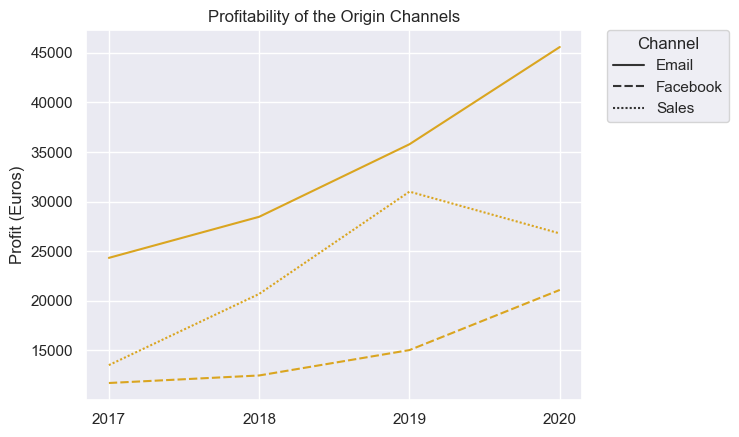

In [250]:
#fig, ax = plt.subplots(figsize=(10, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="order_year", 
                        y="profit",
                        data=profitable_channel_pivot,
                        errorbar=None,
                        color = "goldenrod",
                        style="origin_channel"
                    )


chart.set(xlabel = "", ylabel = "Profit (Euros)", title = "Profitability of the Origin Channels")
#plt.yticks(range(0, 16, 2), range(0, 16, 2))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Channel')
plt.show(chart)

In [251]:
#### Extra 6 - Profitability of the warehouse over time

In [252]:
profitability_pivot = pd.pivot_table(orders_full_data,
            values= ['profit'],
            index=('order_year'),
            aggfunc={'profit':'sum'},
            margins=False)

profitability_pivot

,profit
order_year,
2017,49543.9741
2018,61618.6037
2019,81795.1743
2020,93439.2696


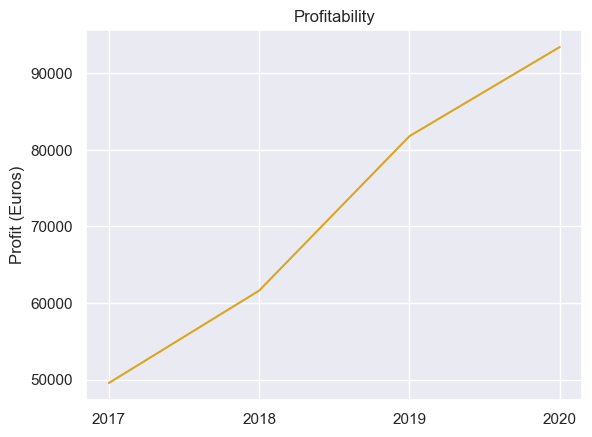

In [253]:
#fig, ax = plt.subplots(figsize=(10, 6))

sns.set_theme(style="darkgrid")
chart = sns.lineplot(   x="order_year", 
                        y="profit",
                        data=profitability_pivot,
                        errorbar=None,
                        color = "goldenrod"
                    )


chart.set(xlabel = "", ylabel = "Profit (Euros)", title = "Profitability")
#plt.yticks(range(0, 16, 2), range(0, 16, 2))
plt.show(chart)

## 5 - Amount of orders over the years

In [254]:
order_count_pivot = pd.pivot_table(orders_full_data,
            values= ['order_id'],
            index=('order_year'),
            aggfunc={'order_id':'count'},
            margins=False)

order_count_pivot

,order_id
order_year,
2017,1993
2018,2102
2019,2587
2020,3312


In [255]:
# Adding order_year to the dataFrame
orders_data['order_year'] = pd.to_datetime(orders_data['order_date']).dt.strftime('%Y')
orders_data.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country_region,city,state,...,region,category,sub_category,product_id,sales,quantity,discount,profit,order_received_day,order_year
0,1,CA-2019-152156,2019-11-08,Second Class,CG-12520,Claire Gute,Email,United States,Henderson,Kentucky,...,South,Toasted Muesli,With Fruit,FUR-BO-10001798,261.96,2,0.0,41.9136,Friday,2019
1,3,CA-2019-138688,2019-06-12,Second Class,DV-13045,Darrin Van Huff,Sales,United States,Los Angeles,California,...,West,Power Muesli,No Taste All Power,OFF-LA-10000240,14.62,2,0.0,6.8714,Wednesday,2019


In [256]:
order_count = orders_data.groupby('order_year', as_index = False)['order_id'].count()
order_count

,order_year,order_id
0,2017,969
1,2018,1038
2,2019,1315
3,2020,1687


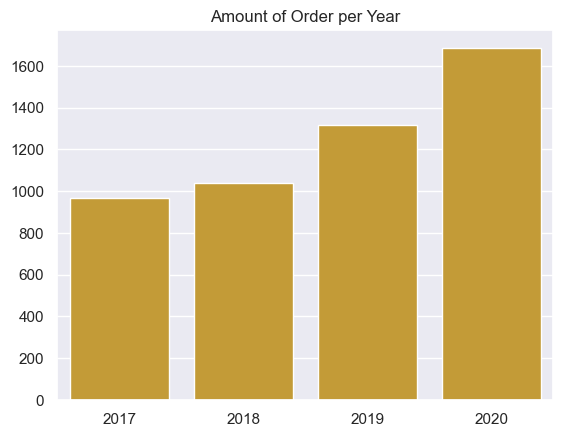

In [257]:
#fig, ax = plt.subplots(figsize=(10, 6))

sns.set_theme(style="darkgrid")
chart = sns.barplot(   x="order_year", 
                        y="order_id",
                        data=order_count,
                        errorbar=None,
                        color = "goldenrod"
                    )


chart.set(xlabel = "", ylabel = "", title = "Amount of Order per Year")
#plt.yticks(range(0, 16, 2), range(0, 16, 2))
plt.show(chart)